<h1><p><center style="background: linear-gradient(to right,white,green);color: transparent;font-family: Gabriola;color: navy;font-size: 210%;text-align: center;border-radius: 10px 70px">
     📈 Gold and USO and SLV Price 💰
</center></p></h1>

![price](https://paytmblogcdn.paytm.com/wp-content/uploads/2023/09/Blog_Paytm_Gold-Rates-Historical-Data-for-India-800x500.jpg)


<a class="anchor" id="setup"></a>
<br>
<br>
<br>
<font style="font-family:Gabriola; font-size:300%;">1️⃣ Step 1 | About Dataset </font><br>
 <br>   
<br>

<div style = 'border : 3px solid non; background-color:#F0FFFF ; ;padding:10px'>

<a class="anchor" id="about_dataset"></a>

<p style="font-family:Georgia;padding:20px;line-height:25px;";><font style="font-family:Georgia; font-size:210%;"> 👁‍🗨About Dataset </font><br>


    
**Welcome, data enthusiasts!**

Data Overview: This data file is a Comma separated value file format with 2290 rows and 7 columns. It contains 5 columns which are numerical in datatype and one column in Date format. Clearly the data shows value of the variables SPX,GLD,USO,SLV,EUR/USD against the dates in the date column.
    
<br>

<a class="anchor" id="setup"></a>
<br>
<br>
<br>
<font style="font-family:Gabriola; font-size:300%;">2️⃣ Step 2 | Python Libraries </font><br>
 <br>   
<br>

In [1]:
import mysql.connector as msql
from mysql.connector import Error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics
import warnings

<a class="anchor" id="data"></a>
<br>
<br>
<br>
<font style="font-family:Gabriola; font-size:300%;">3️⃣ Step 3 | Getting data from the database </font><br>
 <br>   
<br>

In [3]:
data = pd.read_csv('gld_price_data.csv')

In [4]:
df = pd.DataFrame(data)

In [5]:
try:
    con = msql.connect(host='127.0.0.1',user='root',password='peiman2012')
    if con.is_connected():
        cursor = con.cursor()
        cursor.execute("create database GoldPrice ")
        print("Databases is created....")

except Error as e :
    print("Error while connecting to MYSQL",e)

Error while connecting to MYSQL 1007 (HY000): Can't create database 'goldprice'; database exists


In [6]:
try:

    con = msql.connect(host='127.0.0.1',
                       user='root',
                       password='peiman2012',
                       database='goldprice'
                       )
    if con.is_connected():
        cursor = con.cursor()
        cursor.execute("SELECT DATABASE();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)

 
        cursor.execute('DROP TABLE IF EXISTS GoldP7;')
        print('Creating table....')
        cursor.execute("""
            CREATE TABLE GoldP7 (
                date CHAR(20), 
                SPX FLOAT, 
                GLD FLOAT, 
                USO FLOAT, 
                SLV FLOAT, 
                EUR_USD FLOAT
            )
        """)
        print("Table is created....")

        for index, row in df.iterrows():
            sql = "INSERT INTO GoldP7 (date, SPX, GLD, USO, SLV, EUR_USD) VALUES (%s, %s, %s, %s, %s, %s)"
            cursor.execute(sql, (row['Date'], float(row['SPX']), float(row['GLD']), float(row['USO']), float(row['SLV']), float(row['EUR/USD'])))
        
        con.commit()  
        print("Data inserted successfully.")

except Error as e:
    print("Error while connecting to MYSQL", e)

finally:
    if 'cursor' in locals():
        cursor.close()
    if 'con' in locals():
        con.close()

You're connected to database:  ('goldprice',)

Creating table....

Table is created....

Data inserted successfully.


In [7]:
con = msql.connect(host='127.0.0.1',
                       user='root',
                       password='peiman2012',
                       database='goldprice'
                       )
cursor = con.cursor()
sql = "SELECT * FROM GoldP7 "
cursor.execute(sql)
# Fetch all the records
date = []
SPX = []
GLD = [] 
USO = []
SLV = []
EUR_USD = []
result = cursor.fetchall()
for i in result:
    date.append(i[0])
    SPX.append(i[1])
    GLD.append(i[2])
    USO.append(i[3])
    SLV.append(i[4])
    EUR_USD.append(i[5])
df2 = pd.DataFrame({
    'Date':date,
    'SPX':SPX,
    'GLD':GLD,
    'USO':USO,
    'SLV':SLV ,
    'EUR_USD':EUR_USD})
    

In [8]:
df2['Date'] = pd.to_datetime(df2['Date'], format='%m/%d/%Y').dt.date

In [9]:
df2

Date      SPX      GLD      USO      SLV  EUR_USD
0     2008-01-02  1447.16   84.860  78.4700  15.1800  1.47169
1     2008-01-03  1447.16   85.570  78.3700  15.2850  1.47449
2     2008-01-04  1411.63   85.130  77.3100  15.1670  1.47549
3     2008-01-07  1416.18   84.770  75.5000  15.0530  1.46830
4     2008-01-08  1390.19   86.780  76.0600  15.5900  1.55710
...          ...      ...      ...      ...      ...      ...
2285  2018-05-08  2671.92  124.590  14.0600  15.5100  1.18679
2286  2018-05-09  2697.79  124.330  14.3700  15.5300  1.18472
2287  2018-05-10  2723.07  125.180  14.4100  15.7400  1.19175
2288  2018-05-14  2730.13  124.490  14.3800  15.5600  1.19312
2289  2018-05-16  2725.78  122.544  14.4058  15.4542  1.18203

[2290 rows x 6 columns]

<a class="anchor" id="data"></a>
<br>
<br>
<br>
<font style="font-family:Gabriola; font-size:300%;">3️⃣ Step 4 | EDA </font><br>
 <br>   
<br>

In [10]:
df2.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR_USD    0
dtype: int64

In [11]:
df2.describe()

SPX          GLD          USO          SLV      EUR_USD
count  2290.000000  2290.000000  2290.000000  2290.000000  2290.000000
mean   1654.315777   122.732875    31.842221    20.084997     1.283653
std     519.111540    23.283346    19.523517     7.092566     0.131547
min     676.530000    70.000000     7.960000     8.850000     1.039050
25%    1239.875000   109.725000    14.380000    15.570000     1.171310
50%    1551.435000   120.580000    33.870000    17.268500     1.303295
75%    2073.010000   132.840000    37.827500    22.882500     1.369968
max    2872.870000   184.590000   117.480000    47.260000     1.598800

### Analysis of the data presented in the table
#### General understanding of data

The presented table is a statistical summary of a data set. This data set is most likely related to the prices of a number of financial assets where:

**SPX**: S&P 500 index (one of the most important indices of the American stock market)

**GLD**: An exchange-traded fund (ETF) that tracks the price of gold.

**USO**: ETF that tracks the price of crude oil.

**SLV**: ETF that tracks the price of silver.

**EUR_USD**: Euro to US Dollar exchange rate

Each column in the table corresponds to one of these assets, and the rows provide various descriptive statistics for each asset.

**Interpretation of descriptive statistics**

**count:** The total number of available data for each property. In this case, there are 2290 data for all assets.
**mean: Average price for each asset. For example, the average price of gold during the period under review was about 122.73 dollars.
**std:** standard deviation. This number shows how far, on average, the price of each asset has been away from the average. A **high:** standard deviation indicates greater price volatility.
**min:** The minimum price recorded for each asset.
**25%:** first quarter. It means that 25% of the data were less than this value.
**50%:** middle. It means that 50% of the data were less than this value.
**75%:** the third quarter. It means that 75% of the data were less than this value.
**max:** The maximum price recorded for each asset.

**What information can be extracted from this table?**

Price Volatility: By comparing the standard deviation, you can understand which asset has had more price volatility. For example, if the standard deviation of the USO is greater than that of the GLD, it means that the price of crude oil has been more volatile than the price of gold.
Price Range: By comparing the minimum and maximum price, you can see the price range of each asset.
Price distribution: By using quadrants, you can understand the distribution of prices in general. For example, if the distance between the first and third quartiles for an asset is large, it indicates that the prices have more dispersion.
Uses of this information

**This information can be used for various purposes, including:**

Technical Analysis: Traders can use this information to analyze price trends and predict future movements.
Risk management: Investors can better manage their portfolio risk using this information.
Asset Allocation: This information can help investors in optimal asset allocation.
Limitations of this data

**Time period:** Without knowing the time period for which this data was collected, no accurate analysis can be done.
Influencing factors: Many factors affect the price of these assets, which are not discussed in this table.
Historical data: This data only relates to the past and is not necessarily indicative of the future.

In [12]:
col = df2.shape
print(f'Number of rows : {col[0]} and Number of columns : {col[1]}')

Number of rows : 2290 and Number of columns : 6


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 2290 entries, 0 to 2289

Data columns (total 6 columns):

 #   Column   Non-Null Count  Dtype  

---  ------   --------------  -----  

 0   Date     2290 non-null   object 

 1   SPX      2290 non-null   float64

 2   GLD      2290 non-null   float64

 3   USO      2290 non-null   float64

 4   SLV      2290 non-null   float64

 5   EUR_USD  2290 non-null   float64

dtypes: float64(5), object(1)

memory usage: 107.5+ KB


In [14]:
name3 = list(df2.columns[1:])

In [15]:
def plot_seaborn(n1):
    plt.figure(figsize=(13, 8))
    
    for i in range(len(n1)):
       
        plt.subplot(2, 3, i+1)
        
        sns.histplot(df2[n1[i]], kde=True)
        plt.title(f'Distribution of {n1[i]}')
        
    plt.tight_layout()
    plt.show()

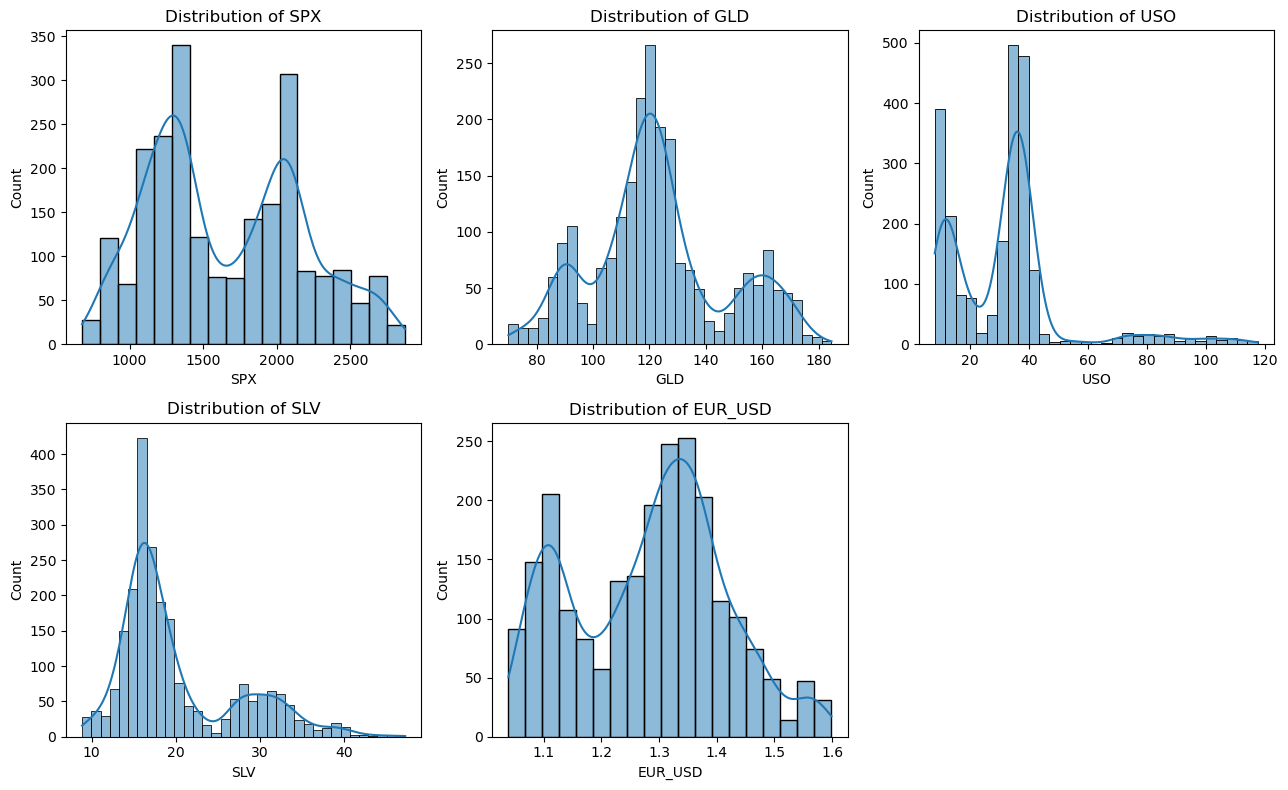

In [16]:
plot_seaborn(name3)

### Data distribution analysis of gold, silver, oil barrels and S&P 500 index

#### Let's examine each of these distributions individually:

#### S&P 500 Index (SPX)
Distribution: The distribution is approximately normal, with a central peak and relatively short tails. This indicates that most of the prices of this index are located around an average value and that large deviations from this value are less common.
Interpretation: The normal distribution of SPX means that the performance of this index is often predictable and sharp and sudden changes occur less often.

#### Gold (GLD)
Distribution: The gold distribution is also roughly normal, but with more dispersion than the SPX. This shows that the price of gold is more volatile than the S&P 500 index.
Interpretation: Greater dispersion in gold prices may be due to various factors such as exchange rate fluctuations, demand for jewelery and safe investments.

#### Oil (USO)
Distribution: Oil distribution is strongly skewed and has a long right tail. This shows that oil prices often experience sudden and significant increases, but sharp decreases are less common.
Interpretation: The volatility of oil distribution is due to various factors such as global oil supply and demand, political tensions and geopolitical events.

#### Silver (SLV)
Distribution: The distribution of silver is similar to gold, almost normal but with more dispersion.
Comment: Greater dispersion in silver prices may be due to industrial demand for silver, safe haven investments and gold price volatility.

#### Euro to US Dollar (EUR_USD)
Distribution: The distribution of the euro to dollar exchange rate is also almost normal.
Interpretation: The normal distribution of the exchange rate shows that the fluctuation of the exchange rate of Euro to the dollar is in a certain range and sharp and sudden changes occur less often.
important points:

Normal distribution: The normal distribution indicates that the random variable (here price) is scattered around a mean value and that large deviations from this value are less common.
Skewedness: Skewedness indicates that the distribution is not symmetrical and has one tail longer than the other.
Dispersion: Dispersion shows how far the data is from the mean value.
Application of these analyses:

Price forecasting: Using these distributions, price forecasting models can be developed and future trends predicted.
Risk Management: Understanding the distribution of prices helps investors better manage their investment risk.
Portfolio construction: Using this information, you can build more diversified portfolios that reduce the overall risk.

In [17]:
def box_seaborn(n1):
    plt.figure(figsize=(13, 8))
    
    for i in range(len(n1)):
       
        plt.subplot(2, 3, i+1)
        
        sns.boxplot(x = df2[n1[i]])
        plt.title(f'Distribution of {n1[i]}')
        
    plt.tight_layout()
    plt.show()

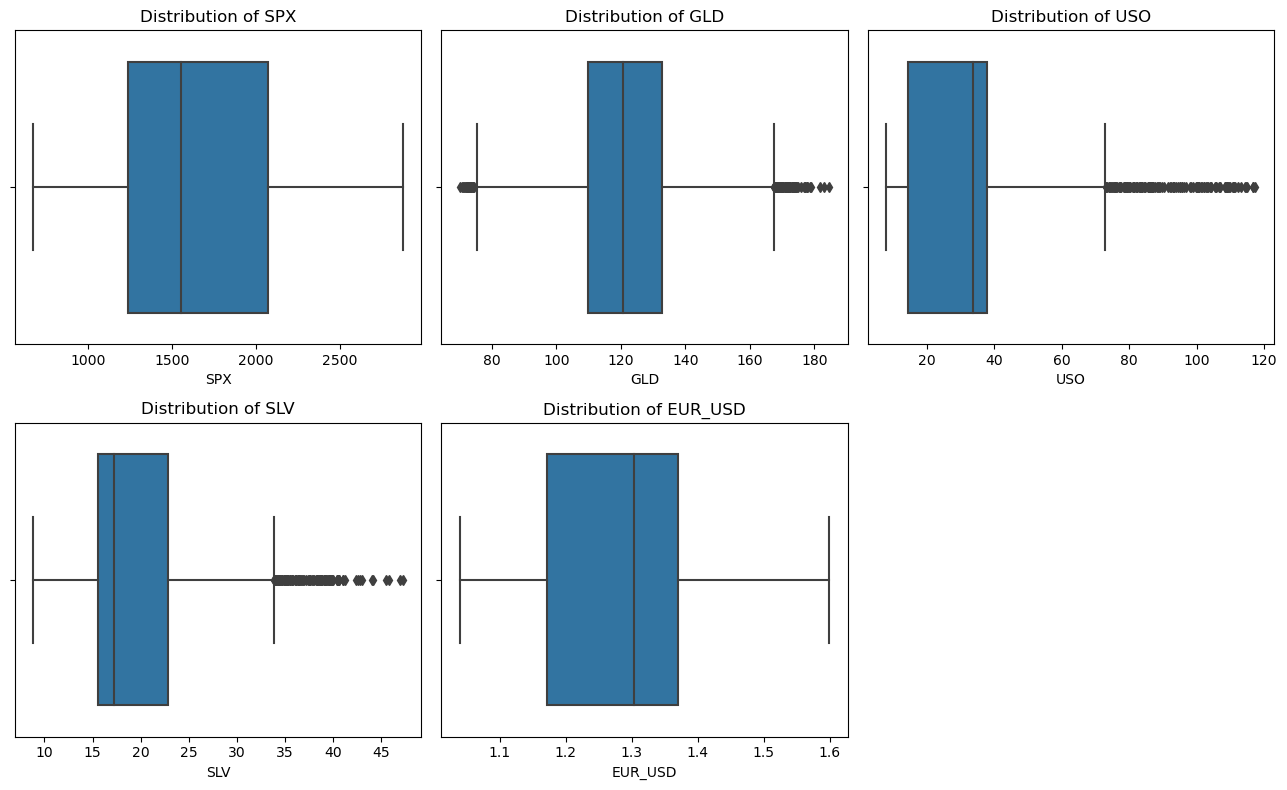

In [18]:
box_seaborn(name3)

### Analysis of box plots of asset price distribution
**Introduction**

Box plots are a very useful tool for displaying data distribution. In these graphs, a box represents the range between the first and third quartiles of the data. The line that divides the box into two equal parts represents the median of the data. Lines extending from the box represent the range of the data, unless there is an outlier, which is indicated by individual points.

As for the presented charts, each chart shows the price distribution of a specific financial asset. By examining these charts, one can obtain useful information about price volatility, data dispersion, and the presence of outliers in each asset.

**Analysis of each chart**

**SPX:** The price distribution of the S&P 500 index is fairly symmetrical with few outliers. This shows that the price of this index has not had significant fluctuations in the time frame under review.

**GLD:** The gold price distribution is slightly stretched, with more outliers on the right side of the chart. This shows that the price of gold has increased significantly in some periods.

**USO:** The distribution of oil prices is also slightly stretched, with more outliers on the right side of the chart. The similarity of this chart to the gold chart shows that oil and gold prices have moved in the same direction in some periods.

**SLV:** Silver price distribution is similar to gold and oil, with more outliers on the right side of the chart.

**EUR_USD:** The distribution of the EUR/USD exchange rate is relatively symmetrical and has few outliers. This shows that the exchange rate of the euro to the dollar has had less fluctuations than the prices of gold, oil and silver in the period under review.

**General conclusion**

**According to the graphs presented, it can be concluded that:**

Price volatility: The price of gold, oil and silver has fluctuated more than the S&P 500 index and the euro-dollar exchange rate. This is especially evident in the case of oil and gold prices.
Outlier data: The presence of outlier data in the charts of gold, oil and silver shows that in some periods, certain factors have caused the price of these assets to increase or decrease sharply.
Correlation: The similarity between the charts of gold, oil and silver suggests that there may be a correlation between the prices of these assets.

In [21]:
name = ['GLD','USO','SLV','EUR_USD','SPX']
name2 = ['Gold ETF (GLD) Price','United States Oil Fund (USO) Price','Silver Trust (SLV) Price','EUR/USD exchange rate','SPX rate']

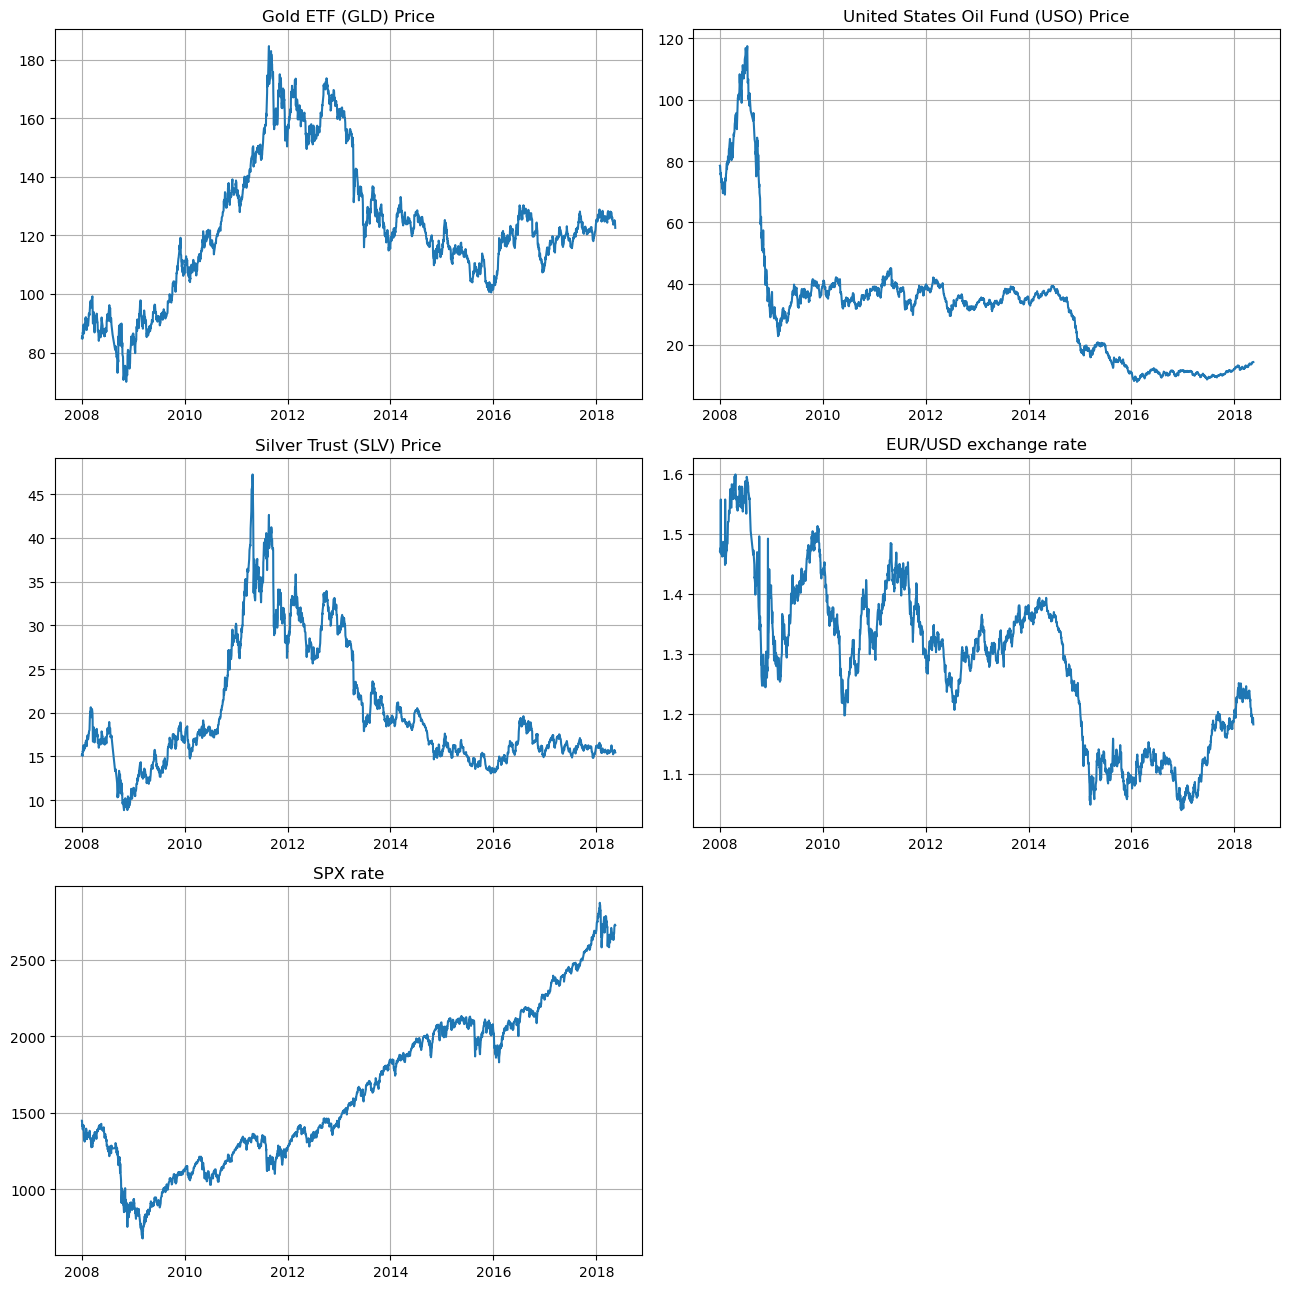

In [26]:
def plot1(n1,n2):
    plt.figure(figsize=(13, 13))
    
    for i in range(len(n1)):
       
        plt.subplot(3, 2, i+1)
        
        plt.plot(df2['Date'],df2[n1[i]])
        plt.title(n2[i])
        plt.grid()
        
    plt.tight_layout()
    plt.show()

plot1(name,name2)        

### Below is a detailed analysis for each chart:

**1. Gold ETF (GLD) Price**

**Time Period: 2008 to 2018**

Trend: The price of the Gold ETF shows a significant rise from around $80 in 2008 to a peak of approximately $180 in 2011-2012. Post-2012, there is a noticeable decline, stabilizing around $110 to $130 range from 2013 to 2018.
Analysis: The peak around 2011-2012 corresponds to a period of economic uncertainty post-2008 financial crisis, where gold is often seen as a safe-haven asset. The decline and subsequent stabilization suggest a return to more stable economic conditions or shifting investor sentiments.

**2. United States Oil Fund (USO) Price**

**Time Period: 2008 to 2018**

Trend: There is a steep decline from over $110 in 2008 to around $20 by 2016, with some fluctuations in between. Post-2016, the price stabilizes around $10 to $20.
Analysis: The sharp decline in 2008 corresponds to the global financial crisis, which led to reduced demand for oil. The fluctuations could be attributed to various geopolitical events and changes in global oil supply and demand dynamics. The stabilization at a lower price suggests a prolonged period of low oil prices.

**3. Silver Trust (SLV) Price**

**Time Period: 2008 to 2018**

Trend: The price rises from around $10 in 2008 to a peak of about $45 in 2011, followed by a decline and stabilization around $15 to $20 from 2014 to 2018.
Analysis: Similar to gold, silver saw a significant increase during the post-2008 financial crisis period, with a peak in 2011. The subsequent decline indicates a shift in market conditions, with silver stabilizing at a lower price in the following years.

**4. EUR/USD Exchange Rate**

**Time Period: 2008 to 2018**

Trend: The exchange rate starts at around 1.6 in 2008, declining to around 1.1 by 2015, with fluctuations in between. There is some recovery post-2015, stabilizing around 1.1 to 1.2.
Analysis: The decline in the EUR/USD exchange rate indicates a strengthening of the US dollar relative to the Euro, particularly post-2008 financial crisis. The fluctuations are likely due to varying economic policies, crises in the Eurozone (e.g., Greek debt crisis), and relative economic performances of the US and Eurozone economies.

**5. SPX (S&P 500 Index) Rate**

**Time Period: 2008 to 2018**

Trend: There is a significant drop in 2008-2009, followed by a strong and steady increase, reaching around 2500 by 2018.
Analysis: The drop corresponds to the 2008 financial crisis, with a subsequent strong recovery indicating a prolonged bull market. This recovery is likely driven by factors such as quantitative easing, economic recovery, and investor confidence in US equities.

**Overall Summary**

**Economic Crisis Impact:** All assets show significant movement around the 2008-2009 period, reflecting the impact of the global financial crisis.

**Safe-Haven Assets:** Gold and silver spiked post-crisis, indicating their roles as safe-haven assets.
Oil Prices: Show a prolonged decline, reflecting changes in global demand and supply dynamics.

**Currency Exchange Rate:** The EUR/USD rate shows the relative strength of the USD against the Euro over the decade.
Equity Market: The S&P 500’s recovery and growth post-crisis reflect a strong equity market performance in the US.

Each chart provides insights into how different markets and assets have reacted over the decade, particularly in response to economic events like the 2008 financial crisis.

In [27]:
df3=df2.copy()

In [28]:
df3['Date'] = pd.to_datetime(df3['Date'])

df3['Year'] = df3['Date'].dt.year
df3['Month'] = df3['Date'].dt.month
df3['Day'] = df3['Date'].dt.day

In [29]:
months_dict = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}

df3['Month Name'] = list(map(lambda x: months_dict[x], df3['Month']))

In [30]:
years = []
for i in df3['Year']:
    if i not in years:
        years.append(i)
years

[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

In [31]:
def bar_plot(n,num,n2):
    plt.figure(figsize=(20, 25))
    
    for i in range(len(num)):
        plt.subplot(6, 3, i+1)
        
        df4=df3[df3['Year']==num[i]]
        plt.barh(df4['Month Name'],df4[n2])
        plt.title(f'{n} in {num[i]}')
    plt.show()
    

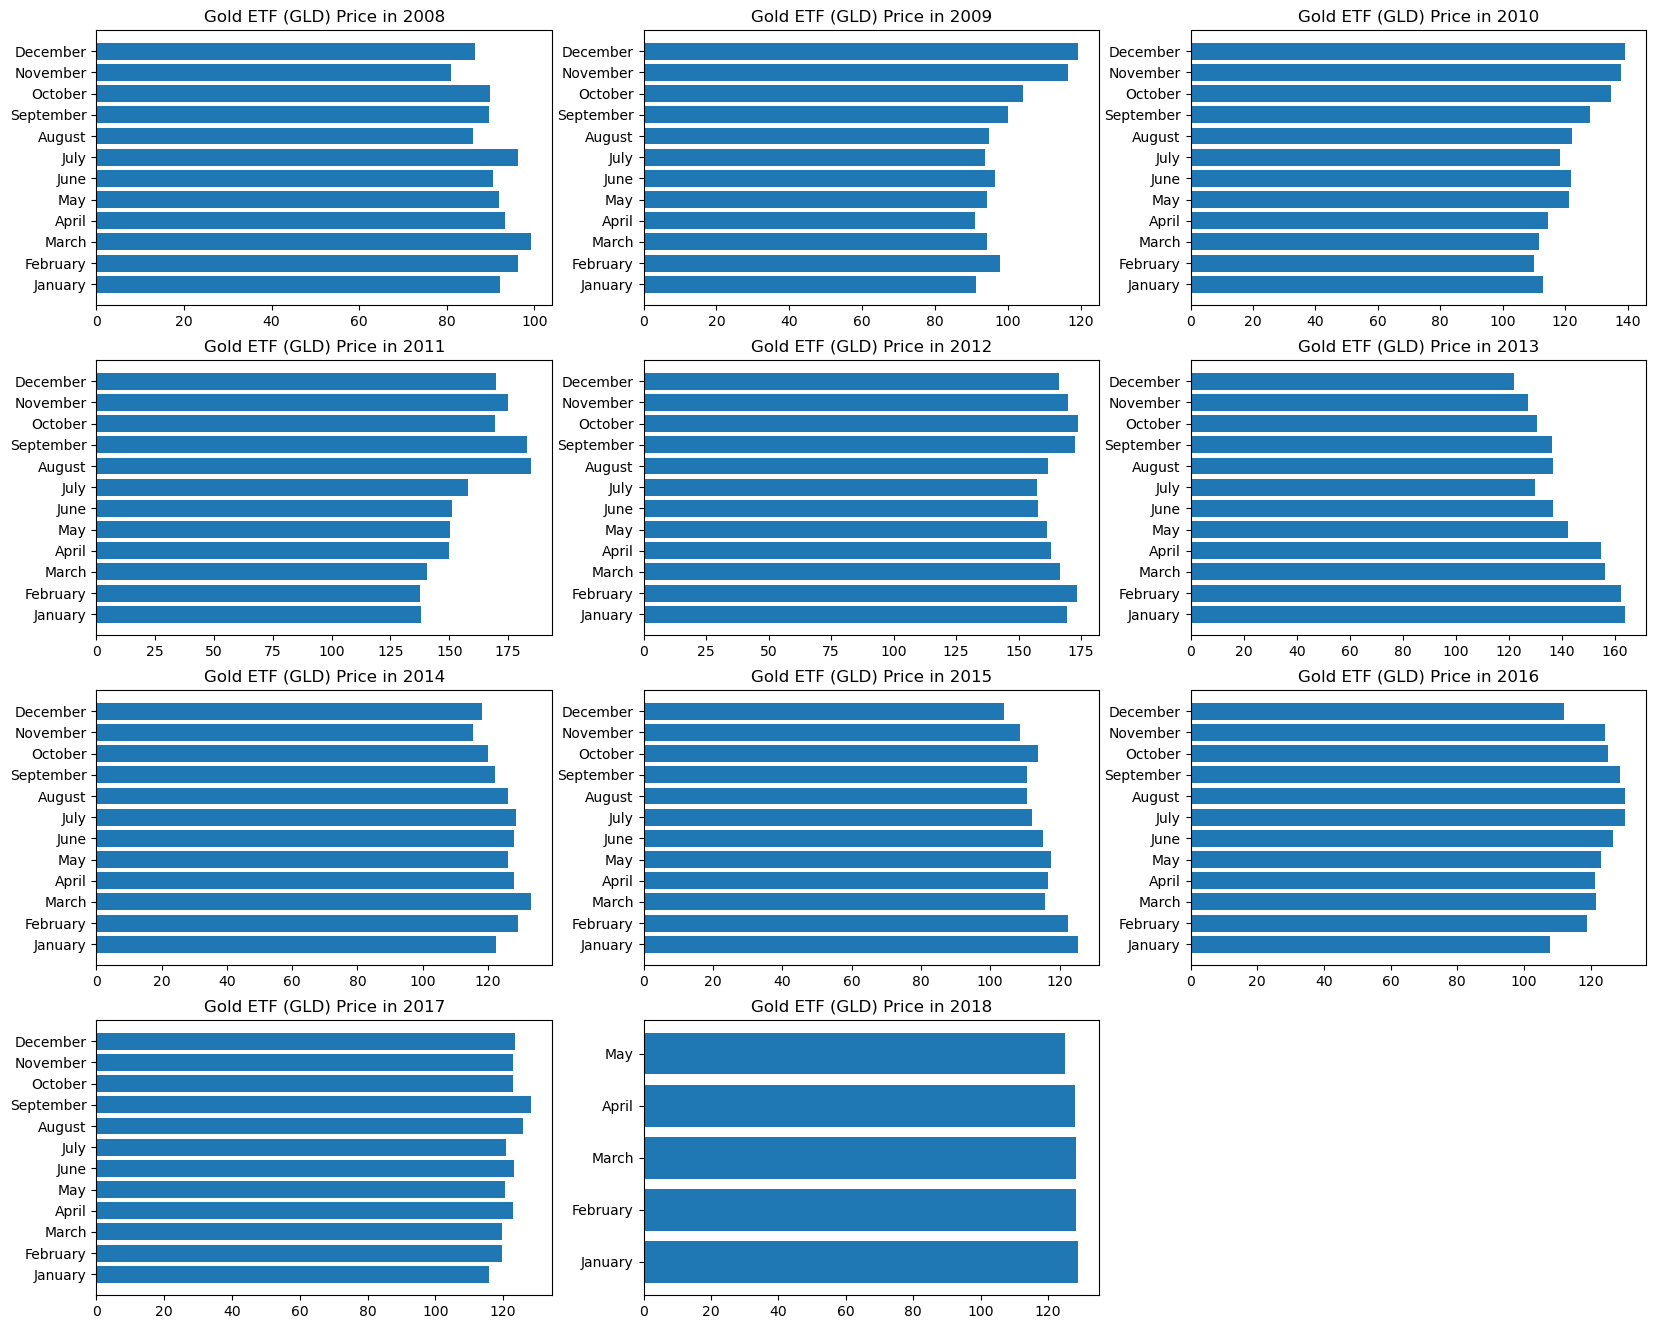

In [32]:
bar_plot(name2[0],years,name[0])

### Analysis of gold price charts (ETF GLD) from 2008 to 2018

**Note:** For a more detailed analysis, we need more detailed numerical data as well as information about the unit of measurement of the price (e.g. USD) and the type of ETF (e.g. stock or mutual fund).

**According to the presented graphs, we can make several general observations:**

**The general trend of gold prices**

Bullish until 2011: From 2008 to mid-2011, the price of gold had a significant upward trend. This period is associated with the global financial crisis and economic concerns, and gold as a safe asset has attracted the attention of investors.
Decline through 2015: After peaking in 2011, gold prices have been on a downward trend through 2015. This decrease may be related to reasons such as improving global economic conditions, strengthening the US dollar and decreasing demand for gold as a safe haven.

Relative stability until the end of the period: From 2015 to 2018, the gold price fluctuated less and generally stayed in a certain price range.

**Seasonal fluctuations**

No Significant Seasonal Fluctuations: Based on these charts, there does not appear to be significant seasonal fluctuations in gold prices. Of course, for a more detailed investigation, more long-term data and statistical analysis are needed.

**Factors affecting the price of gold**

**Several factors influence the price of gold, including:**

Global economic conditions: economic crises, inflation rate, interest rate, economic growth and monetary policies of central banks
Demand for gold: Demand for gold as investment, jewelry and various industries
Gold supply: the amount of gold production, gold reserves in central banks and investors
Exchange rate: Fluctuations in exchange rates, especially the US dollar, affect the price of gold.
Political and geopolitical events: Political tensions, wars and social unrest can affect the price of gold.

**important things**

Difference between gold price and gold ETF: It should be noted that the price of gold ETF may also be affected by factors such as management fees and supply and demand in the ETF market.
The importance of technical and fundamental analysis: To predict the price of gold, technical and fundamental analysis are both important. Technical analysis examines price patterns and volume of transactions, while fundamental analysis examines economic and political factors affecting the price of gold.

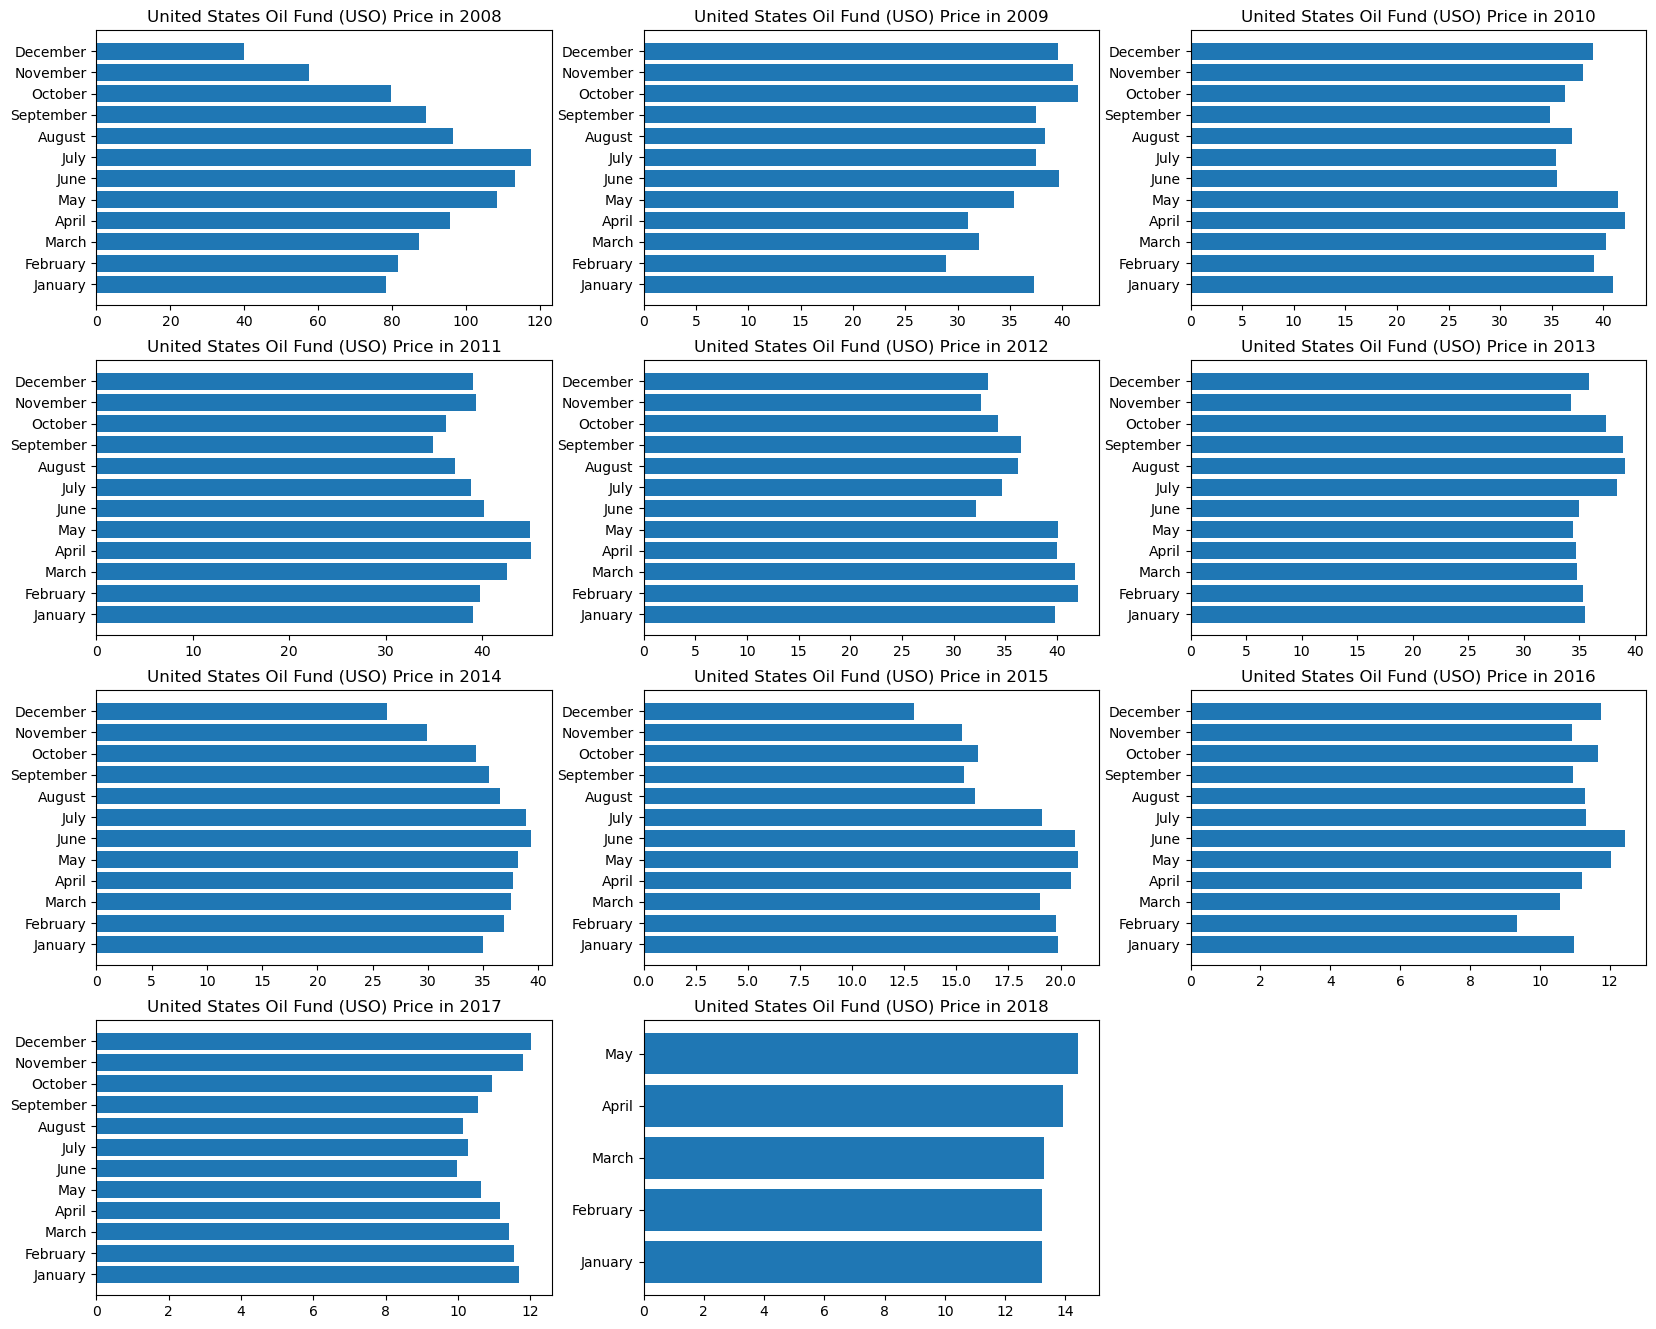

In [33]:
bar_plot(name2[1],years,name[1])

### Analysis of Crude Oil (USO) price charts from 2008 to 2018

**Overview**

The presented graphs show the changes in crude oil prices (measured using the USO exchange-traded fund) in the period from 2008 to 2018. Each bar in the chart represents the average price of crude oil in a particular month. By examining these charts, we can identify several general trends:

Extreme fluctuations: Crude oil prices have experienced extreme fluctuations during the period under review. These fluctuations are influenced by various factors including supply and demand, geopolitical events, and changes in energy policies of different countries.

Declining prices in 2014-2016: After peaking in the early years of the decade, crude oil prices experienced a significant decline in 2014-2016. The decline was mainly due to increased shale oil production in the United States and lower demand as a result of China's sluggish economic growth.

Attempts to recover in 2017-2018: Since late 2016, crude oil prices have shown attempts to recover. This improvement was due to production cut agreements between OPEC member countries and some independent producers.

**Deeper analysis based on charts**

**2008:** Due to the global financial crisis, we saw extreme fluctuations in the price of crude oil.

**2009:** After a sharp decline in 2008, crude oil prices begin to recover.

**2010-2012:** Crude oil prices were generally on the rise.

**2013-2016:** As mentioned earlier, this period saw a significant drop in crude oil prices.

**2017-2018:** Crude oil prices gradually recovered, but still experienced significant volatility.

**Factors affecting crude oil price fluctuations**

**Several factors influence crude oil price fluctuations, including:Supply and demand:** Changes in the global supply and demand of crude oil are one of the most important factors determining the price.

**Geopolitical events:** Political conflicts, sanctions, and unrest in oil-producing regions can affect oil supply and prices.

**Government energy policies:** Government energy policies, especially major oil producing and consuming countries, affect the oil market.

**Exchange rate:** Fluctuations in exchange rates, especially the US dollar, affect the price of crude oil, which is usually traded in dollars.

**Changes in Technology:** Technological developments in the oil and gas industry, such as shale oil extraction, can affect the supply and price of oil.

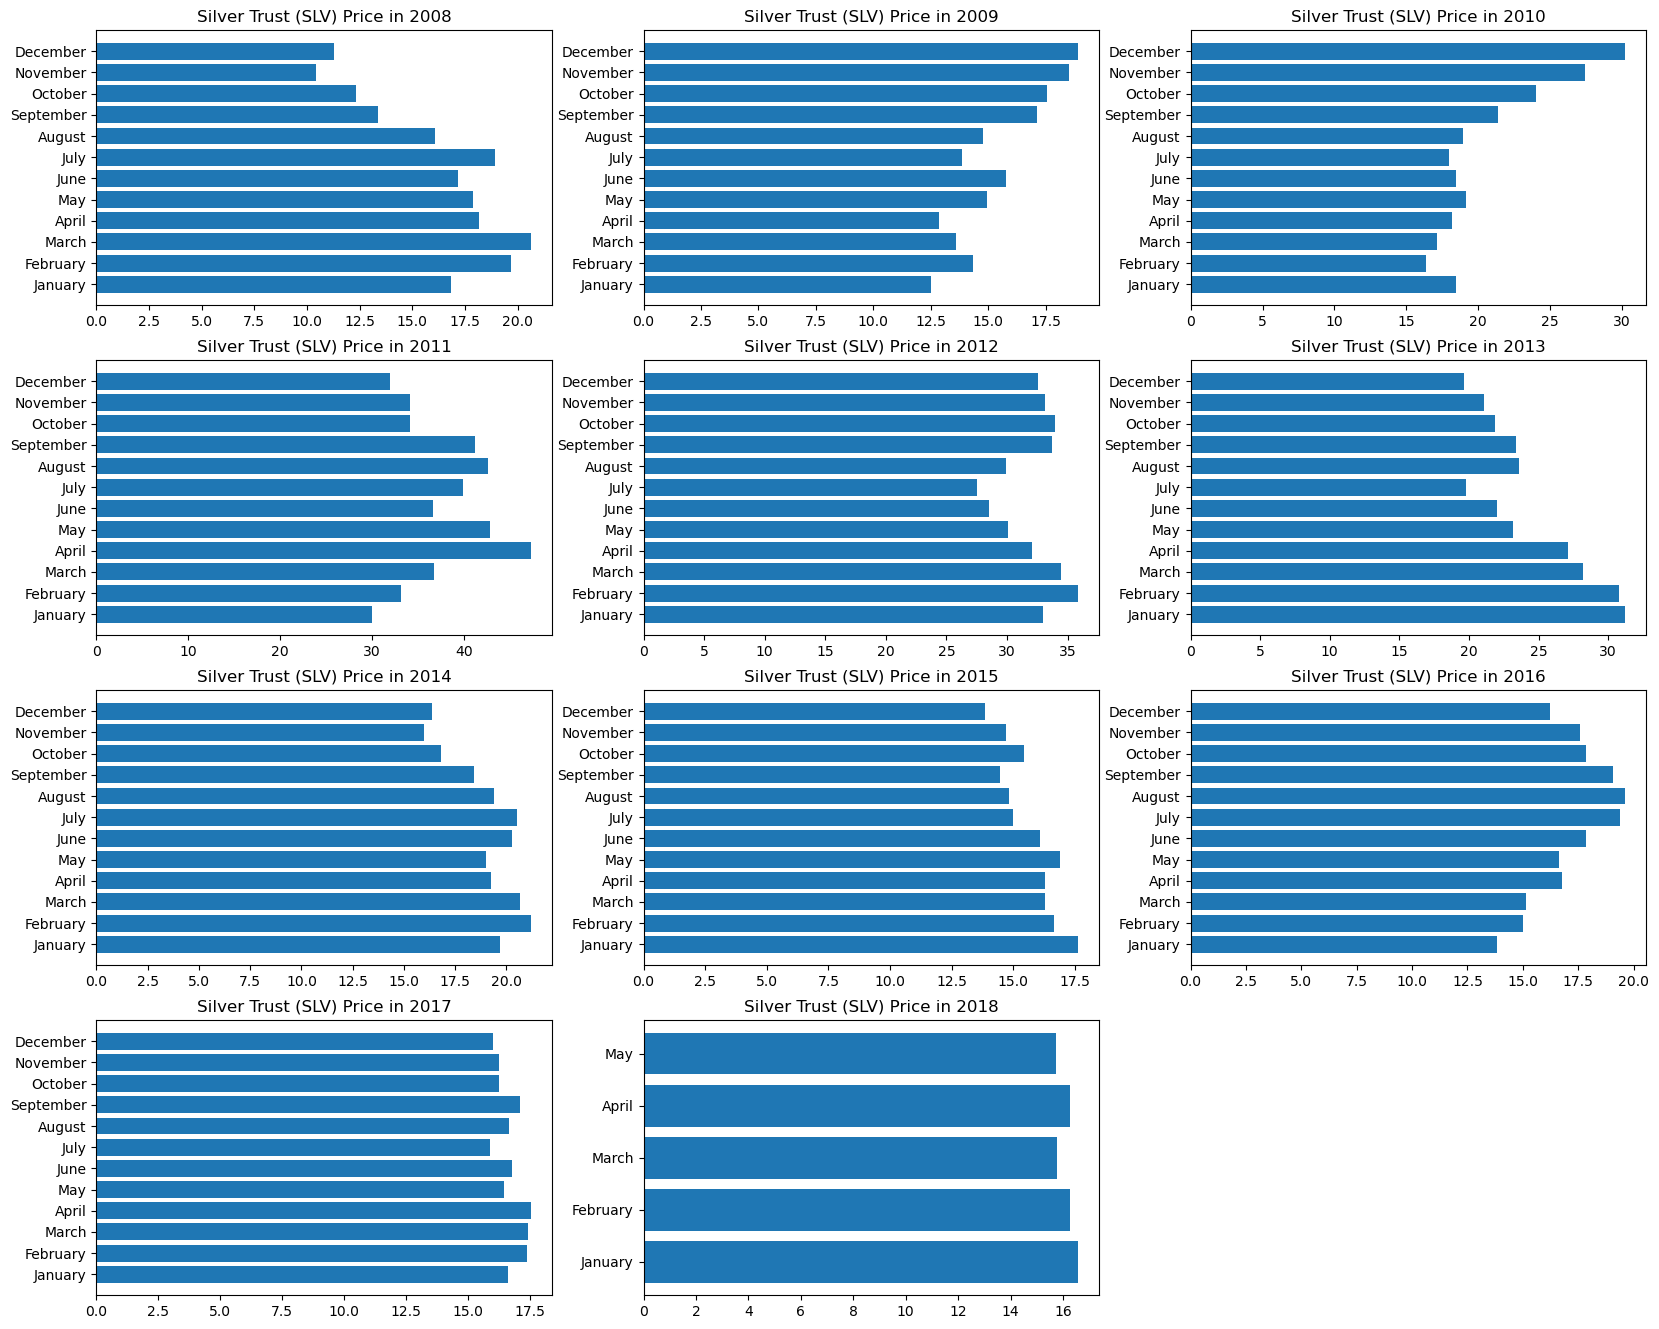

In [34]:
bar_plot(name2[2],years,name[2])

### Analysis of Silver Price Charts (SLV) from 2008 to 2018


**General process**

Significant rise early in the decade: As the charts show, the price of silver had a significant upward trend from 2008 to the mid-2010s. This price increase may be related to reasons such as improving global economic conditions, increasing demand for silver in various industries (such as electronics and solar energy), and investing in silver as a safe-haven asset.
Decline and stabilization at the end of the decade: After peaking in the middle of the decade, the price of silver took a downward trend and stabilized in a certain price range in the last years of the decade. This decrease may be related to market saturation, lower inflation rate and increased silver supply.

**seasonal fluctuations**

No significant seasonal fluctuations: Based on these charts, there does not appear to be significant seasonal fluctuations in silver prices. Of course, for a more detailed investigation, more long-term data and statistical analysis are needed.

**Factors affecting the price of silver**

**Several factors affect the price of silver, including:**

**Global economic conditions:** Economic crises, inflation rate, interest rate, economic growth and monetary policies of central banks

**Demand for silver:** Demand for silver in various industries such as electronics, solar energy, jewelry and investment

**Silver supply:** The amount of silver production, silver reserves in central banks and investors

**Exchange rate:** Fluctuations in exchange rates, especially the US dollar, affect the price of silver.

**Political and geopolitical events:** Political tensions, wars and social unrest can affect the price of silver.

**important things**

**Difference between silver price and silver ETF:** It should be noted that the price of silver ETF may be affected by factors such as management fees and supply and demand in the ETF market.

**The importance of technical and fundamental analysis:** Technical and fundamental analysis are both important for predicting the price of silver. Technical analysis examines price patterns and volume of transactions, while fundamental analysis examines economic and political factors affecting the price of silver.

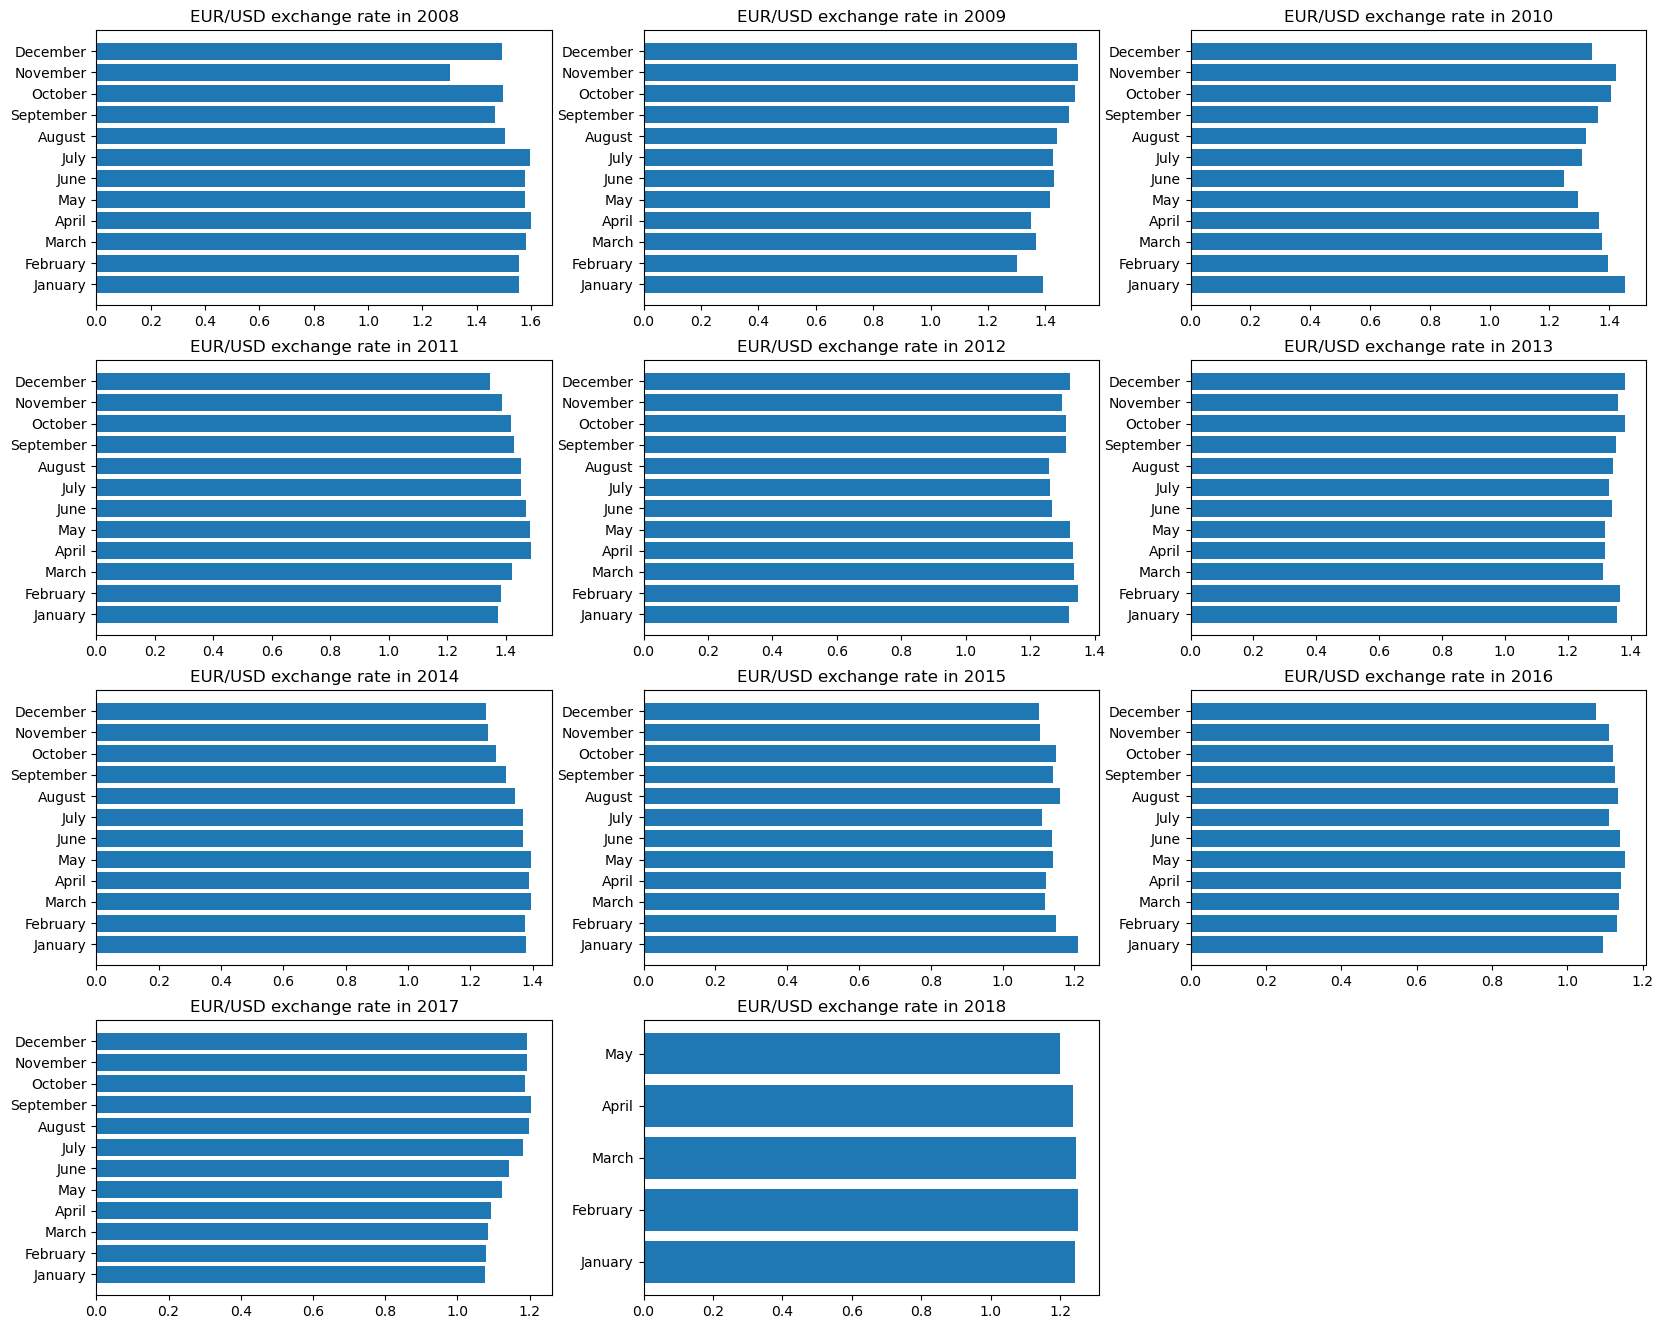

In [35]:
bar_plot(name2[3],years,name[3])

### Analysis of the graphs of the exchange rate of the euro to the dollar (EUR/USD) from 2008 to 2018

**Note**: The charts posted are related to the Euro to Dollar (EUR/USD) parity rate and not the dollar and euro prices separately. The parity rate shows how many dollars are needed to buy one euro.

**Overview of charts**

From examining the graphs presented, we can derive several key points:

**Significant Fluctuations:** The Euro-Dollar parity rate has had significant fluctuations during the period under review. These fluctuations are influenced by various economic, political factors and global events.

**Gradual decline in early decade:** In the early years of the decade (2008 to about 2012), we saw a gradual decline in the value of the Euro against the dollar. This decrease may be related to the global financial crisis and the economic problems of the Eurozone.

**Relative stability in the middle of the decade:** From about 2012 to 2015, the EUR/USD parity was in a relatively stable range.

**Volatility again at the end of the decade:** In 2016 and 2017, the parity rate again experienced significant volatility. These fluctuations may be due to the US presidential election, the monetary policies of the European Central Bank (ECB) and other related factors.

**Relative Stabilization in 2018:** In 2018, the EUR/USD parity was generally within a certain price range.

**Effective factors on the exchange rate of the euro to the dollar**

Several factors affect the exchange rate of currencies, including:

**Economic Conditions:** Economic growth rates, inflation rates, interest rates, labor market conditions and public debt in both the Eurozone and the United States.

**Monetary policies:** European Central Bank (ECB) and US Federal Reserve (Fed) decisions on interest rates and bond buying policies

**Political events:** Elections, changes in governments, political and geopolitical tensions
Trade balance: the trade surplus or deficit of each of the two regions

**Psychological factors:** Investor confidence, speculation and market sentiment
Use of this information

**Investment:** This information is very useful for currency investors. By analyzing the volatility of the exchange rate, they can make better decisions to buy or sell currency.

**International trade:** Companies that operate in international trade can use this information to manage the risk of exchange rate fluctuations.

**Economic policymaking:** Policymakers can use this information to evaluate the effectiveness of their economic policies and make appropriate decisions.

In [36]:
def seasen(n):
    se = []
    for i in n:
        if i >= 1 and i <= 3:
            se.append('Winter')
        elif i >= 4 and i <= 6:
            se.append('Spring')
        elif i >= 7 and i <= 9:
            se.append('Summer')
        elif i >= 10 and i <= 12:
            se.append('Autumn')
    return se


df3['Season'] = seasen(df3['Month'])
            

In [37]:
def bar_plot_seasen(n,num,n2):
    plt.figure(figsize=(20, 25))
    
    for i in range(len(num)):
        plt.subplot(6, 3, i+1)
        
        df4=df3[df3['Year']==num[i]]
        plt.barh(df4['Season'],df4[n2])
        plt.title(f'{n} in {num[i]}')
    plt.show()

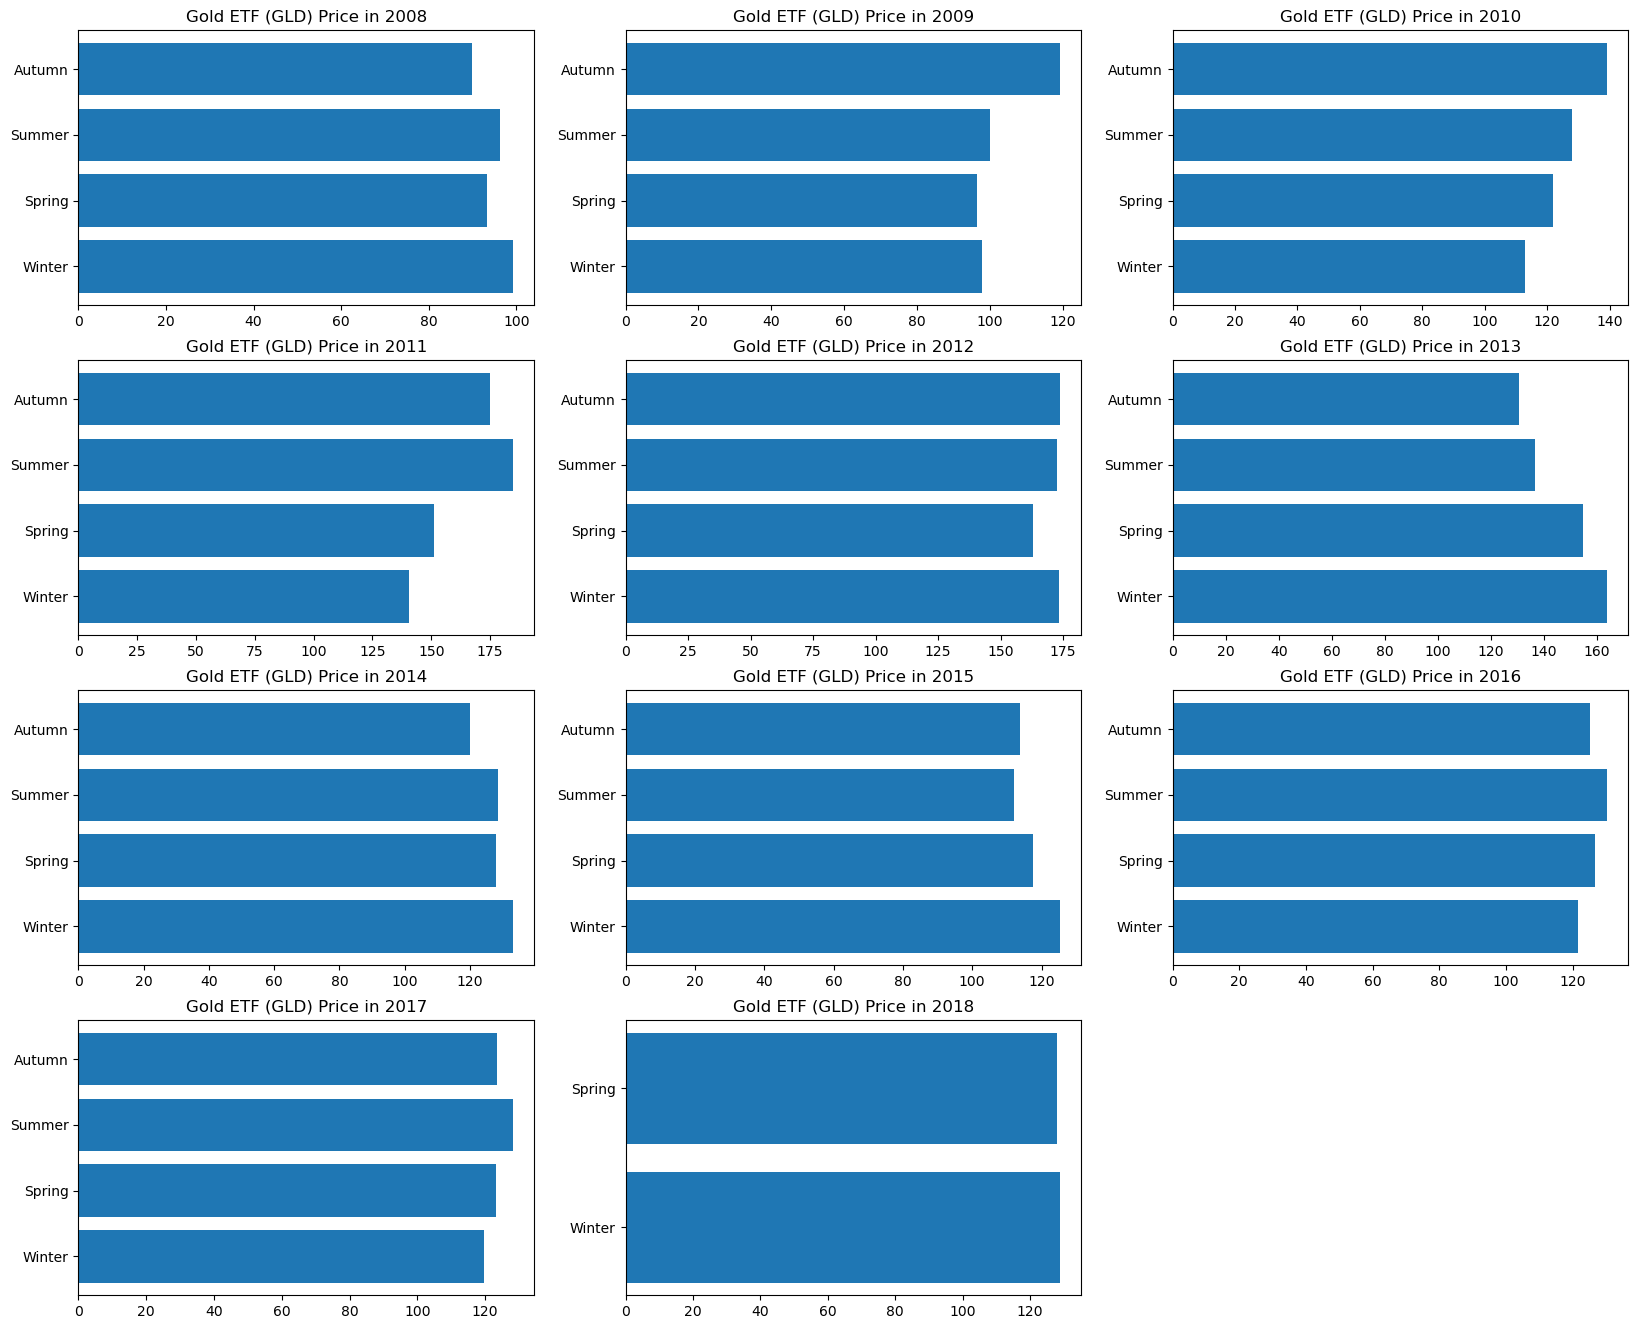

In [38]:
bar_plot_seasen(name2[0],years,name[0])

### Analysis of gold price charts (GLD) based on seasons from 2008 to 2018

**Overview of charts**

From examining the graphs presented, we can make several general observations:

**Price changes during the year:** It seems that the price fluctuations of gold during the year are not very significant. That is, in general, the price of gold does not differ significantly in different seasons of the year.

**Upward trend until 2011:** Until 2011, we generally see an upward trend in gold prices. This price increase may be due to the global financial crisis and increased demand for gold as a safe-haven asset.

**Decreasing and stabilizing after 2011:** After 2011, the price of gold started a downward trend and stabilized in a certain price range in the following years. This decrease may be related to the improvement of global economic conditions and the decrease in demand for gold as a safe haven.

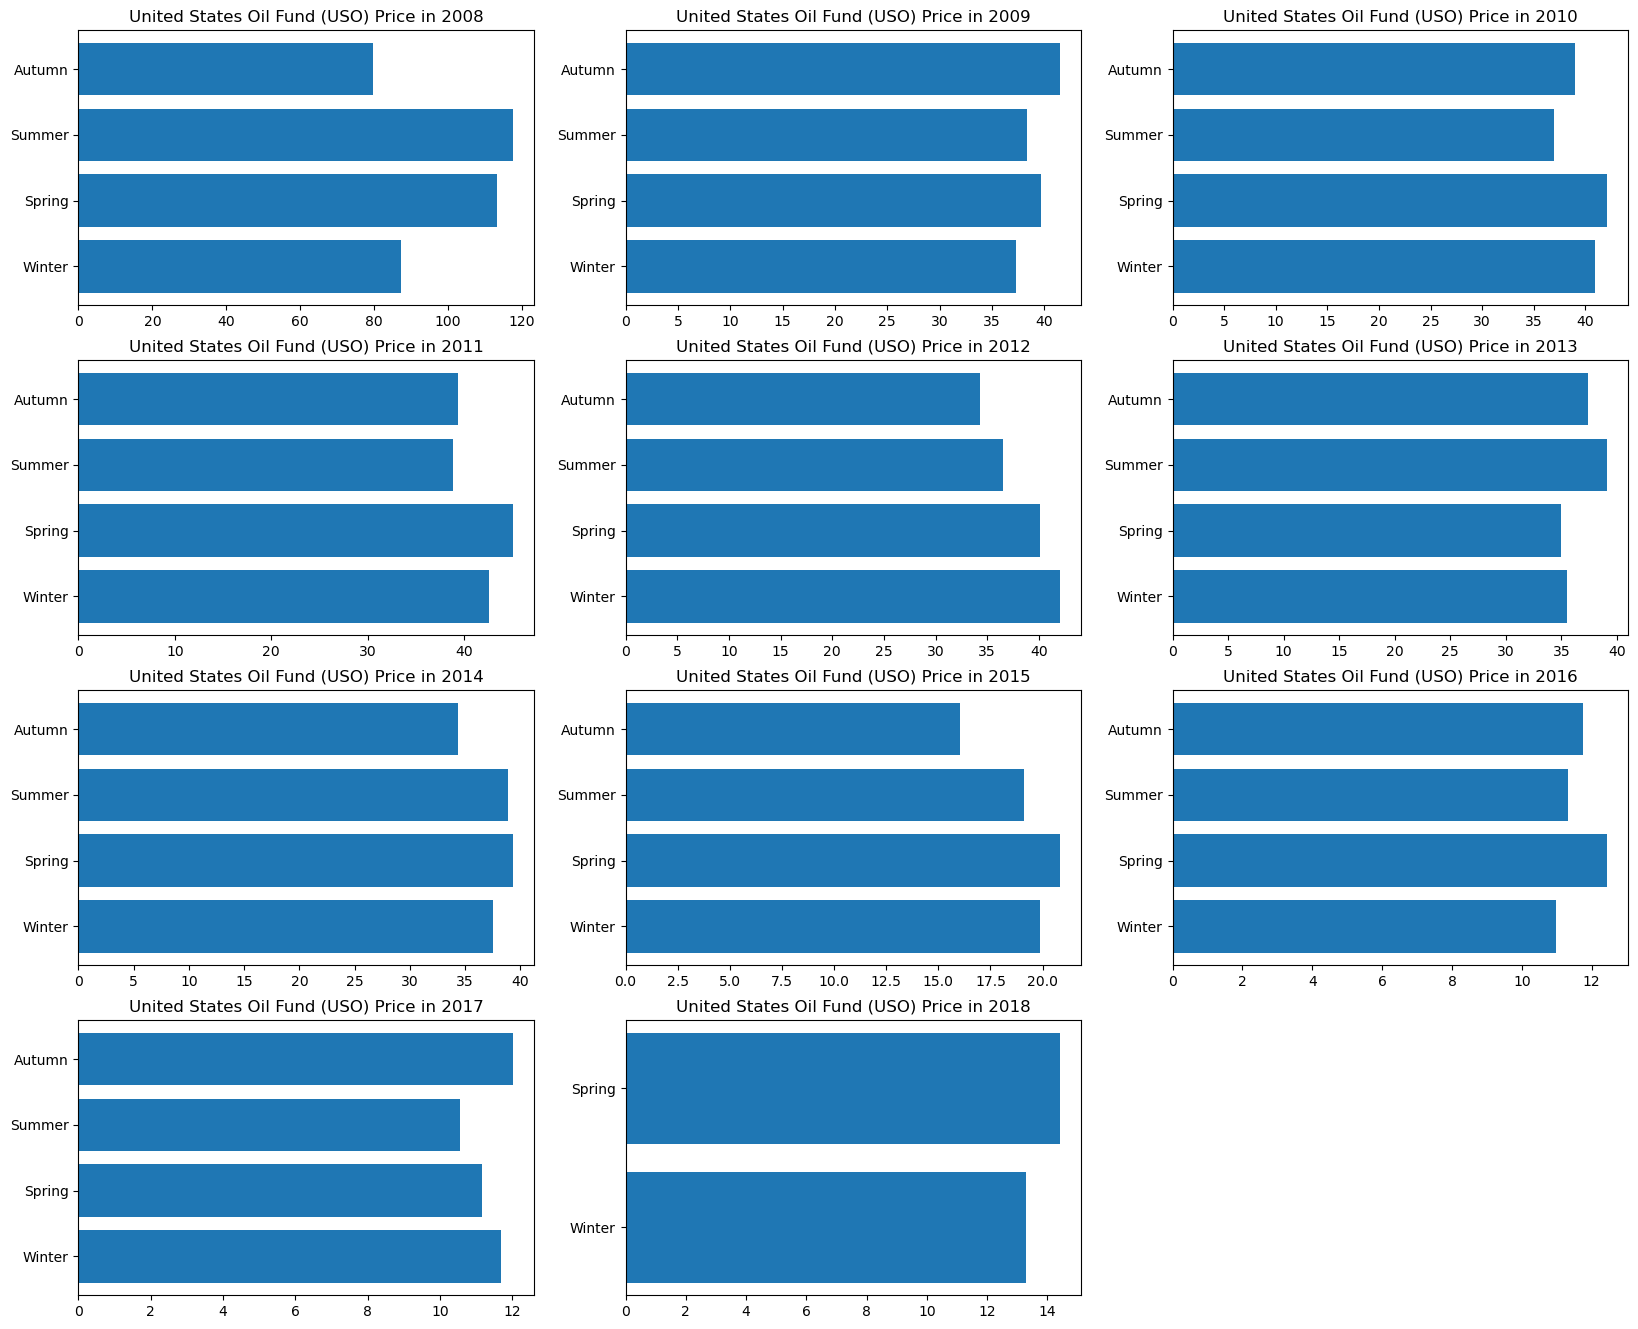

In [39]:
bar_plot_seasen(name2[1],years,name[1])

### Correction and analysis of crude oil price charts (USO):

The graphs presented show the changes in crude oil prices (measured using the USO exchange-traded fund) over the period of 2008 to 2018. Each bar in the chart represents the average price of crude oil in a particular season. By examining these charts, we can identify several general trends:

**General process**

**Severe fluctuations:** Crude oil prices have experienced severe fluctuations during the period under review. These fluctuations are influenced by various factors including supply and demand, geopolitical events, and changes in energy policies of different countries.

**Price Decline in 2014-2016:** After peaking in the early years of the decade, crude oil prices experienced a significant decline in 2014-2016. The decline was mainly due to increased shale oil production in the United States and lower demand as a result of China's sluggish economic growth.

**Trying to recover in 2017-2018: **Since late 2016, crude oil prices have shown attempts to recover. This improvement was due to production cut agreements between OPEC member countries and some independent producers.

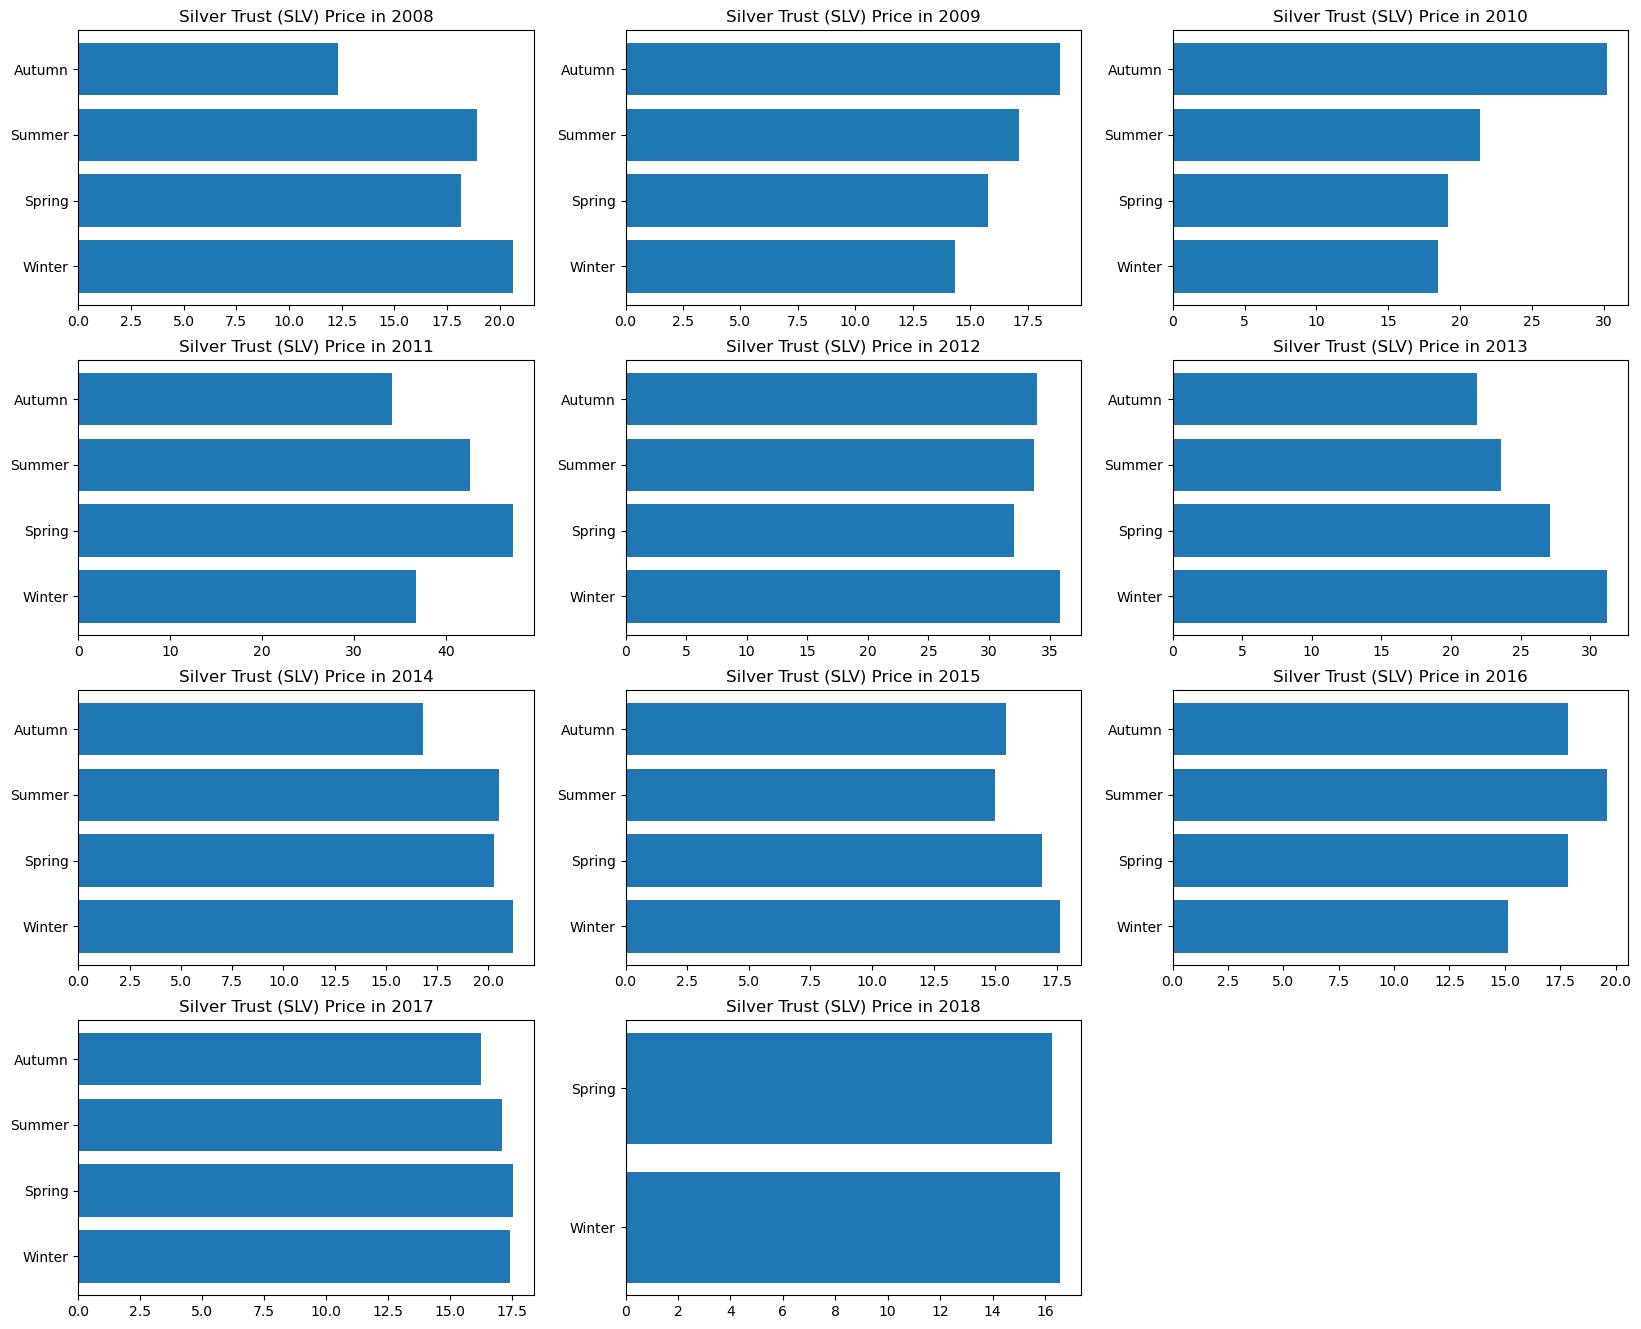

In [40]:
bar_plot_seasen(name2[2],years,name[2])

### Silver price (SLV) chart analysis from 2008 to 2018 by seasons

**Overview:**

The presented graphs show the fluctuations of silver price (SLV) in the period of 11 years, from 2008 to 2018, based on different seasons of the year. By looking at these charts, several key points can be extracted:

**Overall Bullish Trend:** Overall, the price of silver has been bullish during this time frame. This shows that the demand for silver in the world markets has increased.

**Seasonal Fluctuations:** Although the overall trend is upward, significant seasonal fluctuations are observed in silver prices. In some years, the price of silver has experienced the greatest increase or decrease in a certain season of the year.

**Lack of specific seasonal pattern:** Despite seasonal fluctuations, a specific pattern that repeats itself in all years is not observed. In other words, it is not possible to introduce a specific season as always bullish or bearish for the price of silver.

**Deeper Analysis:**

**Causes of seasonal fluctuations:** Seasonal fluctuations in the price of silver can have various reasons, including:

**Seasonal demand in different industries:** Some industries like jewelry may have more demand for silver in certain seasons of the year.

**Holidays and special events:** Holidays and special events such as Christmas and Chinese New Year can affect the demand and therefore the price of silver.

**Economic and political factors:** Changes in global economic and political conditions can also affect the price of silver.

**Limitations of the analysis:** These charts only provide a general picture of silver price fluctuations and cannot explain all the factors influencing the price. For a more detailed analysis, other factors such as interest rates, inflation, silver supply, and government policies should also be considered.

**Conclusion:**

According to the information presented in the graphs, it can be concluded that the price of silver has been on an upward trend during the period under review, but significant seasonal fluctuations are observed. In order to invest in the silver market, in addition to analyzing the price charts, other factors should also be considered and a comprehensive analysis should be used.

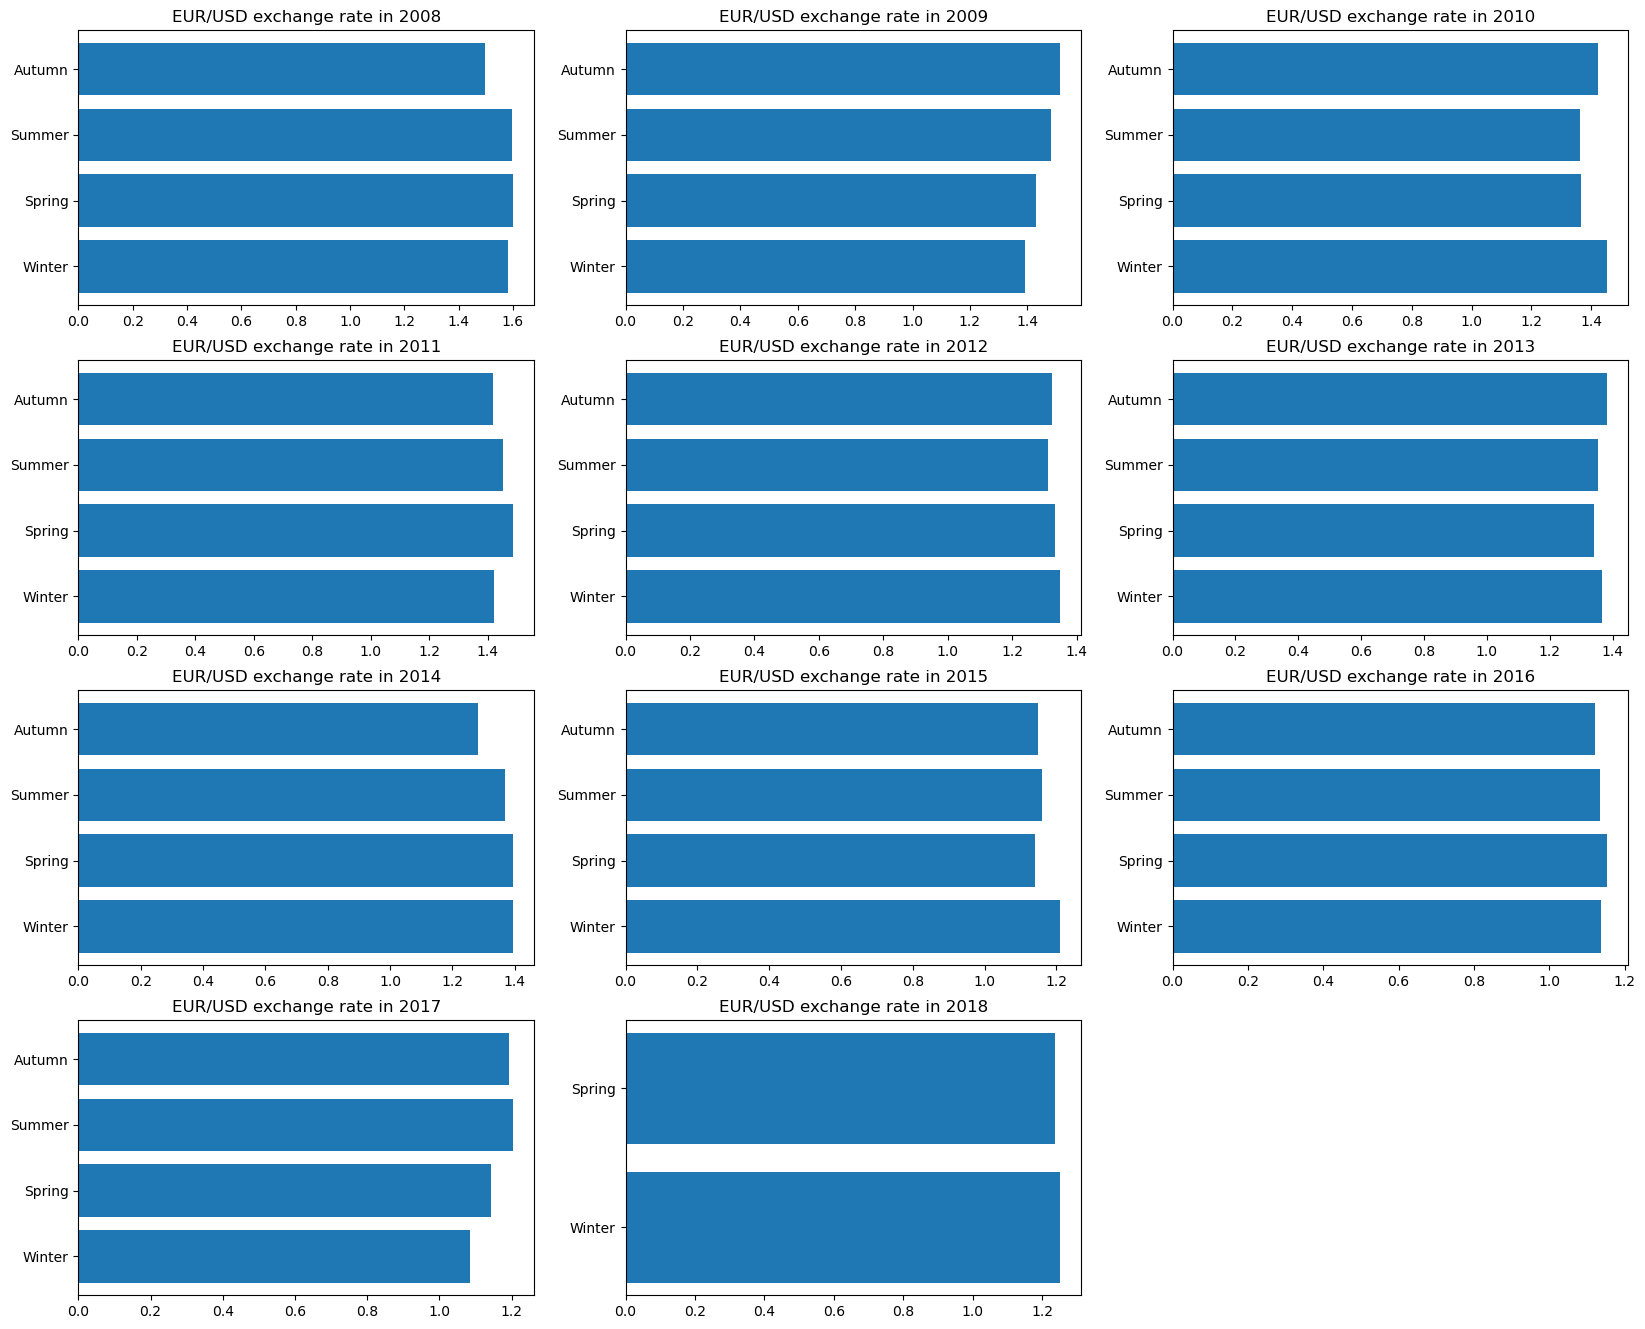

In [41]:
bar_plot_seasen(name2[3],years,name[3])

### Analysis of the exchange rate chart of Euro to Dollar (EUR/USD) in the period from 2008 to 2018

**Note:** The presented chart shows the exchange rate of Euro to Dollar (EUR/USD) in different seasons from 2008 to 2018. Each bar in the graph represents the average exchange rate in a particular season.

**General observations:**

**Slight Seasonal Changes:** From the graphs, it seems that the exchange rate of Euro to Dollar has experienced very little seasonal fluctuations. In other words, significant changes are not observed between the average exchange rate in different seasons of a year or between different years.

**Relative stability:** In general, the exchange rate was relatively stable during the period under review and did not have strong fluctuations. Of course, this does not mean that the exchange rate is completely constant, and there have certainly been daily and weekly fluctuations.

**Overall Trend:** More detailed data and deeper analysis is needed to see an overall upward or downward trend in this timeframe. However, based on the presented charts, it is not possible to talk about a definite trend.

**Possible reasons for the relative stability of the exchange rate:**

**Monetary policies of central banks:** The monetary policies of the European Central Bank (ECB) and the Federal Bank of America (FED) have played an important role in the relative stability of the exchange rate during this period.

**Global economic factors:** Global economic events such as the global financial crisis of 2008 and the gradual improvement of the global economy after that have influenced the exchange rate of currencies.

**Trade relations between Europe and the United States:** The volume and type of trade between the Eurozone and the United States also affects the exchange rate.

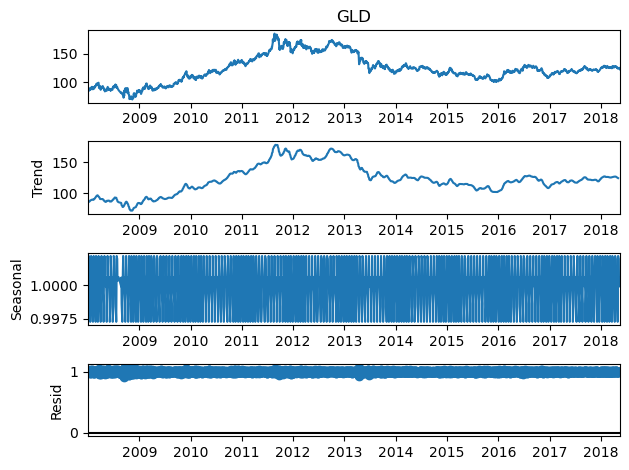

In [219]:
from statsmodels.tsa.seasonal import seasonal_decompose 
  
price = pd.read_csv('gld_price_data.csv', index_col='Date', parse_dates=True)


result = seasonal_decompose(price['GLD'], model='multiplicative', period=12)

result.plot()
plt.show()

### Analysis of gold time series (GLD) breakdown charts

**Graph analysis**

**Main series (GLD):**

The price of gold has fluctuated a lot during the period under review.
There seems to be a general upward trend in gold prices.
There are many short-term fluctuations in the price of gold, which can be influenced by various factors such as economic, political, etc. events.

**Trend:**

The trend chart shows that the price of gold has generally been on an upward trend.
This upward trend shows that investors have been looking at gold as a safe asset during this period.

**Seasonal:**

The seasonal chart shows significant fluctuations.
It seems that in some seasons of the year, the price of gold has fluctuated more.
These seasonal fluctuations can be related to various factors such as seasonal demand for gold in various industries, holidays and special events, and seasonal economic factors.

**Residual:**

The rest of the chart shows random fluctuations.
These random fluctuations show that factors that are not included in the decomposition model have affected the price of gold.

**Interpretation of results**

**Overall upward trend:** The results of the analysis show that the price of gold has generally been on an upward trend during the reviewed period. This could be due to various reasons such as increased investor concerns about inflation, economic and political instability, as well as increased demand for gold in various industries.

**Seasonal fluctuations:** The presence of seasonal fluctuations in the price of gold shows that seasonal factors also affect the price of gold. These factors can include seasonal demand for gold in various industries, holidays and special events, and related seasonal economic factors.

**Random Fluctuations:** The presence of random fluctuations in the residual shows that factors that are not included in the decomposition model have affected the price of gold. These factors can include unexpected events such as financial crises, changes in monetary policies, and changes in the supply and demand of gold in global markets.

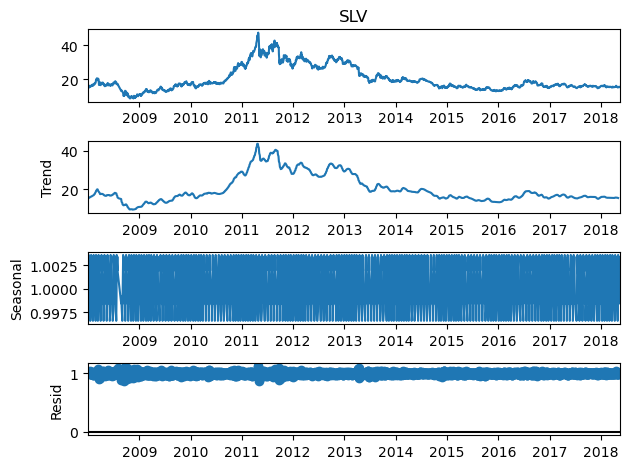

In [220]:
result = seasonal_decompose(price['SLV'], model='multiplicative', period=12)

result.plot()
plt.show()

### Analysis of SLV time series analysis graphs

**Graph analysis**

**Main series (SLV):**

The price of silver fluctuated a lot during the period under review.
There seems to be an overall bullish trend in silver prices.
There are many short-term fluctuations in the price of silver, which can be influenced by various factors such as economic, political, etc. events.

**Trend:**

The trend chart shows that the price of silver has generally been on an upward trend.
This bullish trend shows that investors have been looking at silver as a safe asset during this period.

**Seasonal:**

The seasonal chart shows significant fluctuations.
It seems that in some seasons of the year, the price of silver has fluctuated more.
These seasonal fluctuations can be related to various factors such as seasonal demand for silver in various industries, holidays and special events, and seasonal economic factors.

**Residual:**

The rest of the chart shows random fluctuations.
These random fluctuations show that factors that are not included in the decomposition model have affected the price of silver.

**Interpretation of results**

**Overall upward trend:** The results of the analysis show that the price of silver has been generally upward during the period under review. This could be due to various reasons such as increased investor concerns about inflation, economic and political instability, as well as increased demand for silver in various industries.

**Seasonal fluctuations:** The presence of seasonal fluctuations in the price of silver shows that seasonal factors also affect the price of silver. These factors can include seasonal demand for silver in various industries, holidays and special events, and related seasonal economic factors.

**Random Fluctuations:** The existence of random fluctuations in the residual shows that factors that are not included in the decomposition model have affected the price of silver. These factors can include unexpected events such as financial crises, changes in monetary policies, and changes in the supply and demand of silver in global markets.

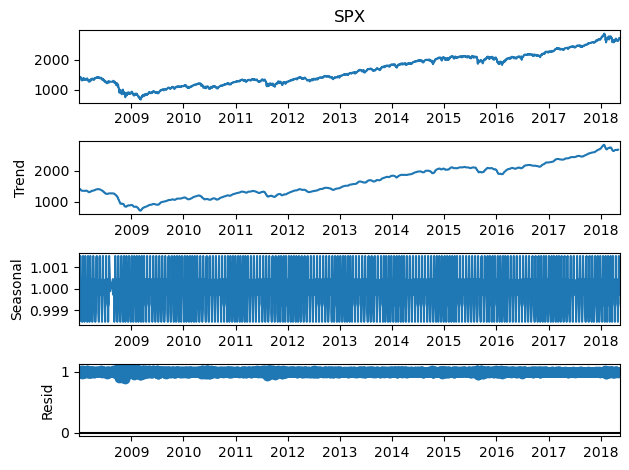

In [221]:
result = seasonal_decompose(price['SPX'], model='multiplicative', period=12)

result.plot()
plt.show()

### Analysis of SPX time series analysis graphs
This kind of decomposition is typically done using a method like Seasonal-Trend decomposition using LOESS (STL). Here's an analysis of each component:

**Original Series (SPX):**
The top plot shows the actual S&P 500 Index values ​​over time, from around 2008 to 2018. The general trend is upwards, indicating a long-term increase in the index value with some fluctuations.

**Trend Component:**
The second plot represents the trend component of the time series. This smooth line captures the overall direction in which the SPX is moving over the years, filtering out short-term fluctuations. It shows a steady upward trend with some deceleration towards the end of the period.

**Seasonal Component:**
The third plot shows the seasonal component. This part captures the regular patterns or cycles that repeat at a consistent interval within the data. In the case of the SPX, the seasonal fluctuations are very minor, indicating that there is not a strong seasonal effect on the SPX index. The values ​​are tightly clustered around 1, indicating very small deviations.

**Residual Component:**
The bottom plot shows the residuals, which are the remaining part of the data after removing the trend and seasonal components. This represents the noise or irregular component. The residuals appear to be randomly distributed around 1, suggesting that the model has effectively captured the trend and seasonality, and what remains is random noise.


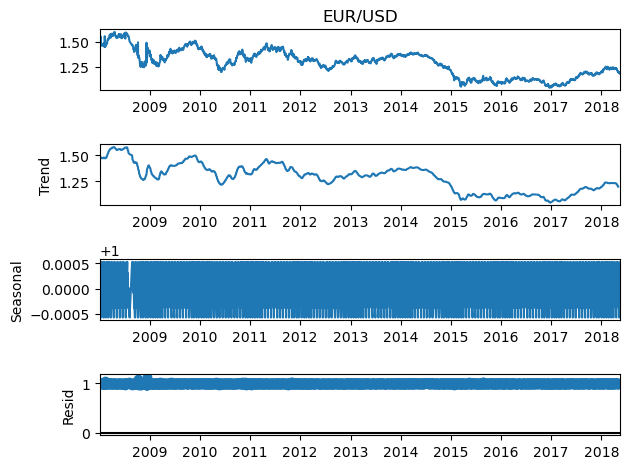

In [222]:
result = seasonal_decompose(price['EUR/USD'], model='multiplicative', period=12)

result.plot()
plt.show()

### Analysis of EUR/USD time series analysis graphs

Here's an analysis of each component:

**Original Series (EUR/USD):**
The top plot shows the actual EUR/USD exchange rate values over time, from around 2008 to 2018. The general trend shows fluctuations with a gradual decline over the period.

**Trend Component:**
The second plot represents the trend component of the time series. This line captures the overall direction in which the EUR/USD exchange rate is moving over the years, smoothing out short-term fluctuations. It shows a downward trend, indicating a general depreciation of the Euro against the US Dollar over this period.

 **Seasonal Component:**
The third plot shows the seasonal component. This part captures the regular patterns or cycles that repeat at consistent intervals within the data. In the case of the EUR/USD exchange rate, the seasonal component values are extremely small, almost negligible. This indicates that there isn't a strong seasonal effect on the EUR/USD exchange rate.

**Residual Component:**
The bottom plot shows the residuals, which are the remaining part of the data after removing the trend and seasonal components. This represents the noise or irregular component. The residuals appear to be randomly distributed, suggesting that the model has effectively captured the trend and seasonality, and what remains is mostly random noise.


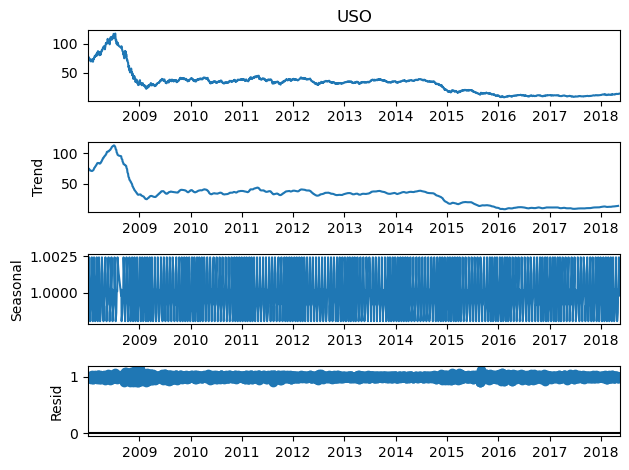

In [223]:
result = seasonal_decompose(price['USO'], model='multiplicative', period=12)

result.plot()
plt.show()

### Analysis of USO time series analysis graphs

Here's an analysis of each component:

**Original Series (USO):**

The top plot shows the actual USO values over time, from around 2008 to 2018. The general trend shows a sharp decline initially and then a more gradual decrease with some fluctuations over the years.

**Trend Component:**

The second plot represents the trend component of the time series. This line captures the overall direction in which the USO is moving over the years, smoothing out short-term fluctuations. The trend shows a sharp drop initially, followed by a more gradual decline and then a leveling off towards the end of the period.

**Seasonal Component:**

The third plot shows the seasonal component. This part captures the regular patterns or cycles that repeat at consistent intervals within the data. In the case of the USO, the seasonal fluctuations are minor but present, indicating some periodic seasonal effect, though it is not very pronounced.

**Residual Component:**

The bottom plot shows the residuals, which are the remaining part of the data after removing the trend and seasonal components. This represents the noise or irregular component. The residuals appear to be randomly distributed, suggesting that the model has effectively captured the trend and seasonality, and what remains is mostly random noise.

In [225]:
gold_relation = df2[['SPX', 'GLD', 'USO', 'SLV', 'EUR_USD']].corr()

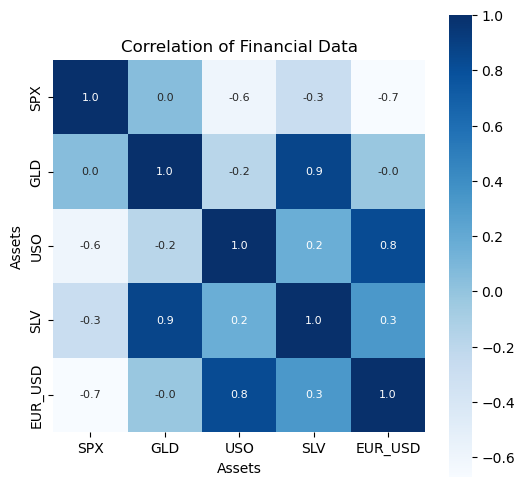

In [226]:
plt.figure(figsize=(6, 6))
sns.heatmap(gold_relation, cbar=True, square=True, fmt='.1f', annot_kws={'size':8}, annot=True, cmap='Blues')
plt.title('Correlation of Financial Data')
plt.xlabel('Assets')
plt.ylabel('Assets')
plt.show()


### Correlation Analysis:
**SPX (S&P 500 Index):**
**GLD (Gold):** Correlation is close to zero (0.0), indicating little to no linear relationship between the S&P 500 and Gold prices.
**USO (Oil):** Negative correlation (-0.6), suggesting that as the S&P 500 index increases, the USO tends to decrease and vice versa.
**SLV (Silver):** Weak negative correlation (-0.3), indicating a slight inverse relationship between the S&P 500 and Silver prices.
**EUR/USD:** Strong negative correlation (-0.7), suggesting that as the S&P 500 index rises, the EUR/USD exchange rate tends to fall and vice versa.

**GLD (Gold):**
**SPX (S&P 500 Index):** As noted, near zero correlation (0.0).
**USO (Oil):** Negative correlation (-0.2), indicating a slight inverse relationship between Gold and Oil prices.
**SLV (Silver):** Strong positive correlation (0.9), indicating that Gold and Silver prices tend to move together.
**EUR/USD:** Near zero correlation (-0.0), indicating little to no linear relationship between Gold prices and the EUR/USD exchange rate.

**USO (Oil):**
**SPX (S&P 500 Index):** Negative correlation (-0.6).
**GLD (Gold):** Negative correlation (-0.2).
**SLV (Silver):** Weak positive correlation (0.2), indicating a slight direct relationship between Oil and Silver prices.
**EUR/USD:** Positive correlation (0.8), suggesting that as Oil prices increase, the EUR/USD exchange rate also tends to rise and vice versa.

**SLV (Silver):**
**SPX (S&P 500 Index):** Weak negative correlation (-0.3).
**GLD (Gold):** Strong positive correlation (0.9).
**USO (Oil):** Weak positive correlation (0.2).
**EUR/USD:** Weak positive correlation (0.3), indicating a slight direct relationship between Silver prices and the EUR/USD exchange rate.

**EUR/USD:**
**SPX (S&P 500 Index):** Strong negative correlation (-0.7).
**GLD (Gold):** Near zero correlation (-0.0).
**USO (Oil):** Positive correlation (0.8).
**SLV (Silver):** Weak positive correlation (0.3).

### Key Insights:
**SPX and EUR/USD:** There is a strong negative correlation, indicating that when the S&P 500 Index increases, the Euro tends to depreciate against the US Dollar.

**GLD and SLV:** There is a strong positive correlation, showing that Gold and Silver prices tend to move together.

**USO and EUR/USD:** There is a strong positive correlation, indicating that Oil prices and the EUR/USD exchange rate tend to move in the same direction.

**SPX and USO:** There is a moderate negative correlation, indicating that the S&P 500 Index and Oil prices tend to move in opposite directions.

This correlation matrix is useful for understanding the relationships between different financial assets, which can help in portfolio diversification and risk management.

<a class="anchor" id="EDA"></a>
<br>
<br>
<br>
<font style="font-family:Gabriola; font-size:300%;">5️⃣ Step 5 | Modeling </font><br>
 <br>   
<br>

<a id="10"></a>
# <p style="background-color:#3B6978;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">💻 Random sampling of data 💻</p>

In [44]:
X = df3.drop(['Date','GLD','USO','Month Name', 'Season','Year', 'Month', 'Day'],axis=1)
y= df3['GLD']

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123)

In [46]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [47]:
lr = LinearRegression()

In [48]:
lr.fit(X_train,y_train)


LinearRegression()

In [49]:
y_pred_lr = lr.predict(X_test)


In [50]:
r2_lr = metrics.r2_score(y_test,y_pred_lr)
mse_lr = metrics.mean_squared_error(y_test,y_pred_lr)
mae_lr = metrics.mean_absolute_error(y_test,y_pred_lr)

print("Mean Squared Error on test set:", mse_lr)
print("R-squared on test set:", r2_lr)
print("Mean Absolute Error on test set:", mae_lr)

Mean Squared Error on test set: 80.54313283734274

R-squared on test set: 0.8549131012621785

Mean Absolute Error on test set: 6.851735205957637


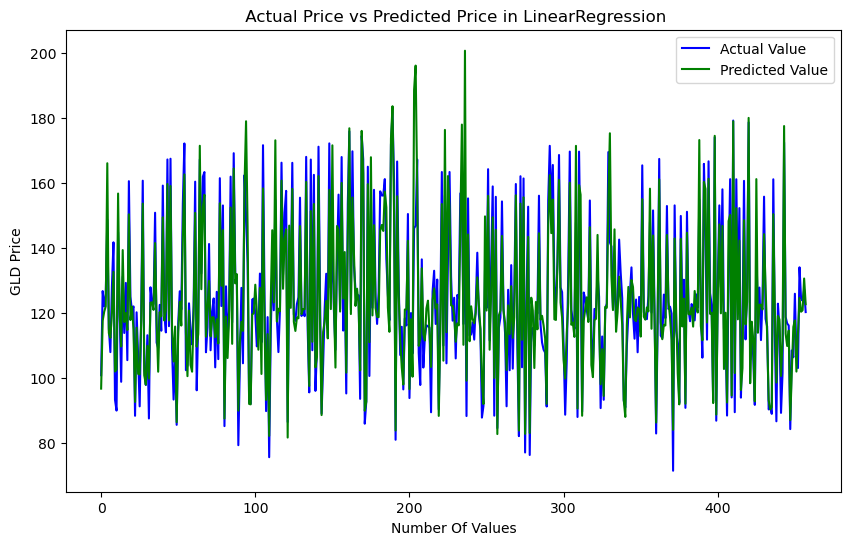

In [51]:
y_test = list(y_test)

plt.figure(figsize=(10, 6))
# Plotting the actual values
plt.plot(y_test, color='blue', label='Actual Value')
# Plotting the predicted values
plt.plot(y_pred_lr, color='green', label='Predicted Value')
# Adding labels and title
plt.title(' Actual Price vs Predicted Price in LinearRegression')
plt.xlabel('Number Of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()


In [52]:
def hist_seaborn(n1,n2,n3,n4):
    plt.figure(figsize=(13, 8))
    
    for i in range(len(n1)):
       
        plt.subplot(2, 3, i+1)
        
        sns.histplot(n1[i], kde=True)
        plt.title(f'Distribution of {n2} in {n4} ({n3[i]})')
        
    plt.tight_layout()
    plt.show()

In [53]:
dt_regressor = DecisionTreeRegressor(random_state=42)
parameter = {'min_samples_split': [1,2, 5, 10, 20],'min_samples_leaf': [1, 2,5, 10],'criterion':['squared_error','friedman_mse','absolutr_error'],'splitter':['best','random'],'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,14,13,15],'max_features':['auto','sprt','log2']}


In [54]:
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=parameter, cv=5,scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 5400 candidates, totalling 27000 fits


C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 

15000 fits failed out of a total of 27000.

The score on these train-test partitions for these parameters will be set to nan.

If these failures are not expected, you can try to debug them by setting error_score='raise'.



Below are more details about the failures:

--------------------------------------------------------------------------------

2568 fits failed with the following error:

Traceback (most recent call last):

  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score

    estimator.fit(X_train, y_train, **fit_params)

  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit

    super().fit(

  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit

    self._validate_params()

  File "C:\ProgramData\anaconda3\lib\site-packages\

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolutr_error'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       14, 13, 15],
                         'max_features': ['auto', 'sprt', 'log2'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [1, 2, 5, 10, 20],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=2)

In [55]:
best_dt_regressor = grid_search.best_estimator_

best_dt_regressor

DecisionTreeRegressor(criterion='friedman_mse', max_depth=12,
                      max_features='auto', min_samples_split=10,
                      random_state=42)

In [56]:
y_pred_dtr = best_dt_regressor.predict(X_test)

In [57]:
r2_dtr = r2_score(y_test, y_pred_dtr)
mse_dtr = mean_squared_error(y_test, y_pred_dtr)
mae_dtr = mean_absolute_error(y_test, y_pred_dtr)


print("Mean Squared Error on test set:", mse_dtr)
print("R-squared on test set:", r2_dtr)
print("Mean Absolute Error on test set:", mae_dtr)


Mean Squared Error on test set: 9.415036349662804

R-squared on test set: 0.9830401627382054

Mean Absolute Error on test set: 1.6398015377431845


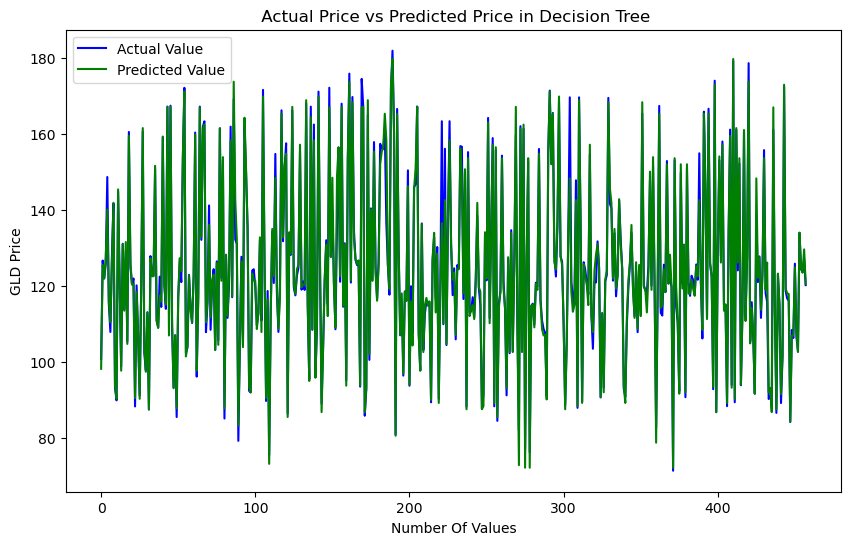

In [58]:
plt.figure(figsize=(10, 6))
# Plotting the actual values
plt.plot(y_test, color='blue', label='Actual Value')
# Plotting the predicted values
plt.plot(y_pred_dtr, color='green', label='Predicted Value')
# Adding labels and title
plt.title(' Actual Price vs Predicted Price in Decision Tree')
plt.xlabel('Number Of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [59]:
rfr = RandomForestRegressor()

param_grid = {'n_estimators': [100, 200, 300],'max_features': ['auto', 'sqrt','log2'],'max_depth': [10, 20, 30, None],'min_samples_split': [2, 5,10],'min_samples_leaf': [1, 2, 4]}

grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5,n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.

  warn(


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [60]:
best_rfr = grid_search.best_estimator_

In [61]:
y_pred_rfr = best_rfr.predict(X_test)


mae_rfr = mean_absolute_error(y_test, y_pred_rfr)
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
r2_rfr = r2_score(y_test, y_pred_rfr)
print(f"Best Random Forest Regressor: {best_rfr}")
print(f"Mean Absolute Error (MAE): {mae_rfr}")
print(f"Mean Squared Error (MSE): {mse_rfr}")
print(f"R-squared (R²): {r2_rfr}")


Best Random Forest Regressor: RandomForestRegressor(max_depth=20, max_features='auto', n_estimators=200)

Mean Absolute Error (MAE): 1.3844082109775193

Mean Squared Error (MSE): 5.385376127256839

R-squared (R²): 0.9902990175162626


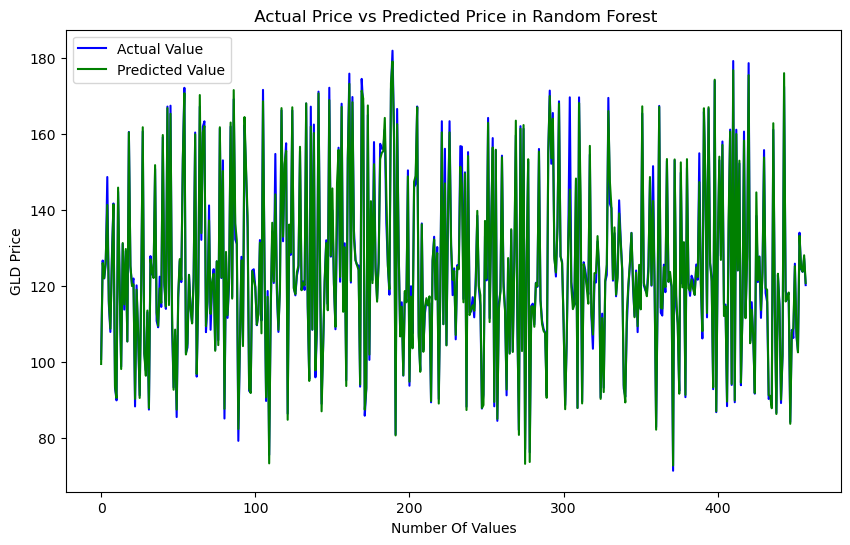

In [62]:
plt.figure(figsize=(10, 6))
# Plotting the actual values
plt.plot(y_test, color='blue', label='Actual Value')
# Plotting the predicted values
plt.plot(y_pred_rfr, color='green', label='Predicted Value')
# Adding labels and title
plt.title(' Actual Price vs Predicted Price in Random Forest')
plt.xlabel('Number Of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [63]:
df5 = pd.DataFrame({'Random Forest':y_pred_rfr,
                   'Decision Tree':y_pred_dtr,
                   'Linear Regression':y_pred_lr,
                   'Actual Data':y_test})
df5

Random Forest  Decision Tree  Linear Regression  Actual Data
0         99.41525      98.148750          96.606160       100.73
1        125.96000     125.472727         117.506742       126.62
2        121.99165     121.895556         120.284008       121.92
3        127.12695     127.500000         121.924422       125.72
4        141.26475     140.018889         165.958272       148.59
..             ...            ...                ...          ...
453      133.14440     133.903333         124.499912       133.94
454      124.69185     124.696667         120.269125       124.36
455      123.69830     123.412500         120.705225       123.65
456      128.00465     129.553333         130.491007       127.15
457      120.70240     120.490000         122.581793       120.16

[458 rows x 4 columns]

In [64]:
try:
    con = msql.connect(host='127.0.0.1',user='root',password='peiman2012')
    if con.is_connected():
        cursor = con.cursor()
        cursor.execute("create database gold ")
        print("Databases is created....")

except Error as e :
    print("Error while connecting to MYSQL",e)

Error while connecting to MYSQL 1007 (HY000): Can't create database 'gold'; database exists


In [65]:
try:
    con = msql.connect(host='127.0.0.1',
                       user='root',
                       password='peiman2012',
                       database='gold'
                       )
    if con.is_connected():
        cursor = con.cursor()
        cursor.execute("SELECT DATABASE();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)
 
        cursor.execute('DROP TABLE IF EXISTS gold;')
        print('Creating table....')
        cursor.execute("""
            CREATE TABLE gold (
                RandomForest FLOAT, 
                DecisionTree FLOAT, 
                LinearRegression FLOAT,
                ActualData FLOAT
            )
        """)
        print("Table is created....")

        for index, row in df5.iterrows():
            sql = "INSERT INTO gold (RandomForest, DecisionTree, LinearRegression , ActualData) VALUES (%s, %s, %s,%s)"
            cursor.execute(sql, (float(row['Random Forest']), float(row['Decision Tree']), float(row['Linear Regression']),
                                float(row['Actual Data'])))
        
        con.commit()  
        print("Data inserted successfully.")

except Error as e:
    print("Error while connecting to MYSQL", e)

finally:
    if 'cursor' in locals():
        cursor.close()
    if 'con' in locals():
        con.close()

You're connected to database:  ('gold',)

Creating table....

Table is created....

Data inserted successfully.


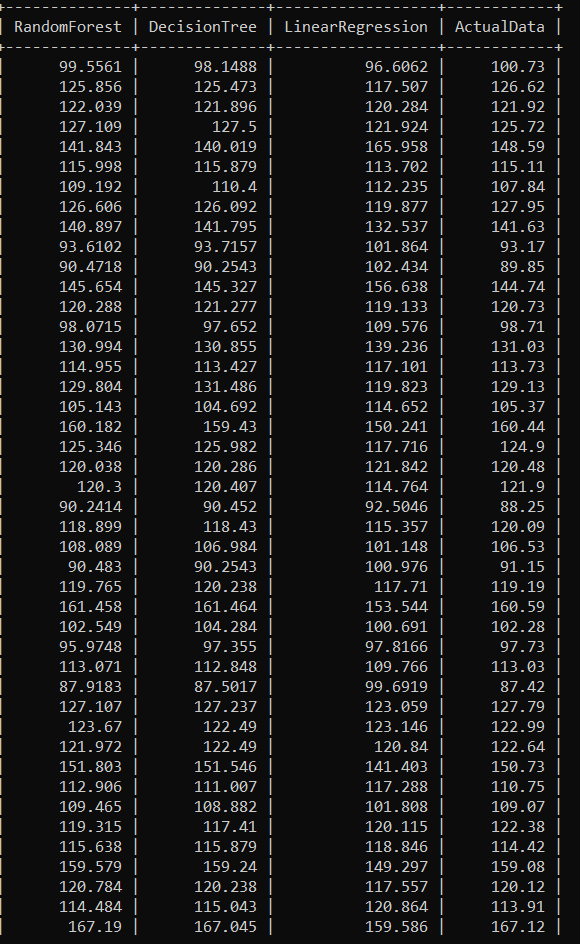

In [66]:
r2rfr=[]
r2dtr=[]
r2lr=[]

In [67]:
r2rfr.append(r2_rfr)
r2dtr.append(r2_dtr)
r2lr.append(r2_lr)

In [68]:
n3=['Predicted','Actual']

In [69]:
n4 = list(df5.columns)

In [70]:
list_value_lr = [list(df5['Linear Regression']),list(df3['GLD'])]

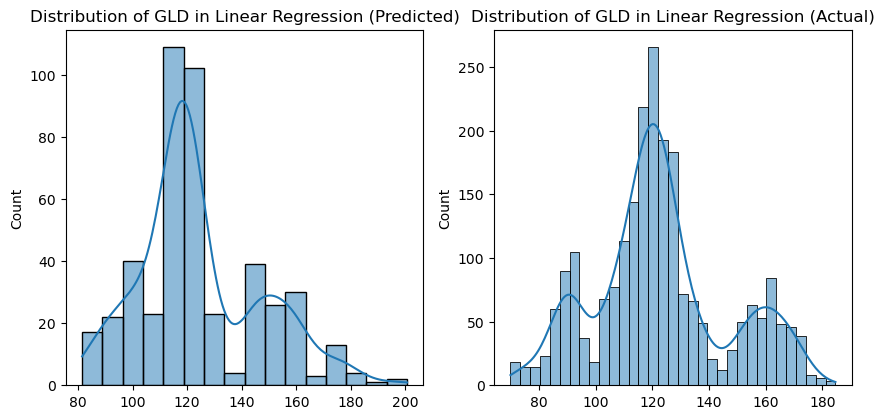

In [71]:
hist_seaborn(list_value_lr,name[0],n3,n4[2])

In [72]:
list_value_dt = [list(df5['Decision Tree']),list(df3['GLD'])]

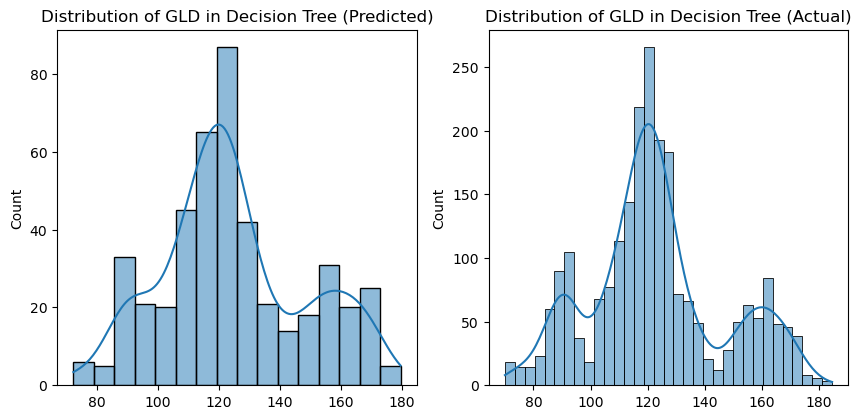

In [73]:
hist_seaborn(list_value_dt,name[0],n3,n4[1])

In [74]:
list_value_fr = [list(df5['Random Forest']),list(df3['GLD'])]

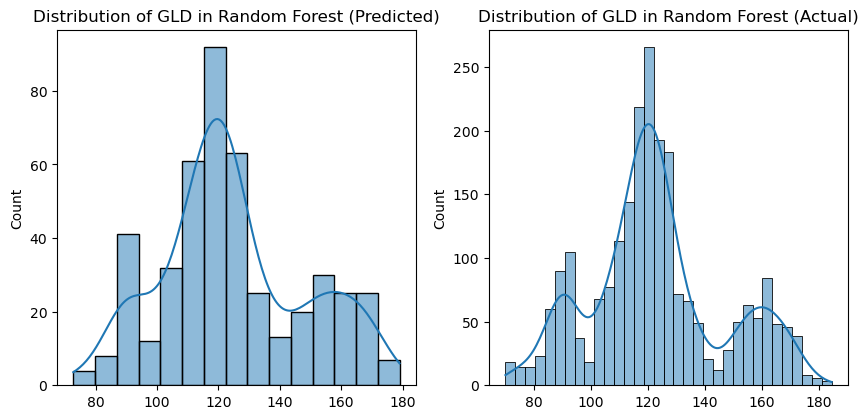

In [75]:
hist_seaborn(list_value_fr,name[0],n3,n4[0])

In [76]:
X = df3.drop(['Date','USO','Month Name', 'Season','Year', 'Month', 'Day'],axis=1)
y= df3['USO']

In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123)

In [78]:
lr.fit(X_train,y_train)

LinearRegression()

In [79]:
y_pred_lr_uso = lr.predict(X_test)

In [80]:
r2_lr_uso = metrics.r2_score(y_test,y_pred_lr_uso)
mse_lr_uso = metrics.mean_squared_error(y_test,y_pred_lr_uso)
mae_lr_uso = metrics.mean_absolute_error(y_test,y_pred_lr_uso)

print("Mean Squared Error on test set:", mse_lr_uso)
print("R-squared on test set:", r2_lr_uso)
print("Mean Absolute Error on test set:", mae_lr_uso)

Mean Squared Error on test set: 98.04462266542319

R-squared on test set: 0.6885528891092679

Mean Absolute Error on test set: 7.385249468792229


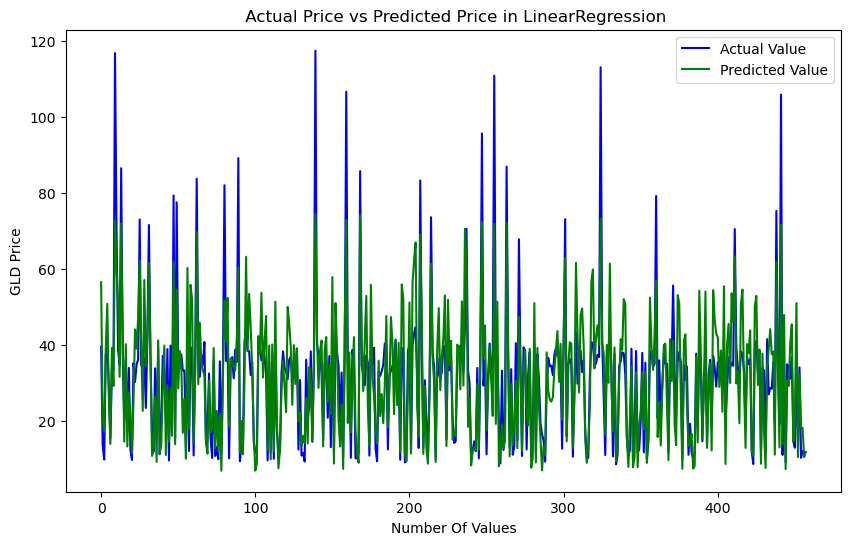

In [81]:
y_test = list(y_test)

plt.figure(figsize=(10, 6))
# Plotting the actual values
plt.plot(y_test, color='blue', label='Actual Value')
# Plotting the predicted values
plt.plot(y_pred_lr_uso, color='green', label='Predicted Value')
# Adding labels and title
plt.title(' Actual Price vs Predicted Price in LinearRegression')
plt.xlabel('Number Of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()


In [82]:
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=parameter, cv=5,scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 5400 candidates, totalling 27000 fits


C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 

15000 fits failed out of a total of 27000.

The score on these train-test partitions for these parameters will be set to nan.

If these failures are not expected, you can try to debug them by setting error_score='raise'.



Below are more details about the failures:

--------------------------------------------------------------------------------

744 fits failed with the following error:

Traceback (most recent call last):

  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score

    estimator.fit(X_train, y_train, **fit_params)

  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit

    super().fit(

  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit

    self._validate_params()

  File "C:\ProgramData\anaconda3\lib\site-packages\s

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolutr_error'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       14, 13, 15],
                         'max_features': ['auto', 'sprt', 'log2'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [1, 2, 5, 10, 20],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=2)

In [83]:
best_dt_regressor = grid_search.best_estimator_

best_dt_regressor

DecisionTreeRegressor(criterion='friedman_mse', max_depth=14,
                      max_features='auto', min_samples_split=20,
                      random_state=42, splitter='random')

In [84]:
y_pred_dtr_uso = best_dt_regressor.predict(X_test)

In [85]:
r2_dtr_uso = r2_score(y_test, y_pred_dtr_uso)
mse_dtr_uso = mean_squared_error(y_test, y_pred_dtr_uso)
mae_dtr_uso = mean_absolute_error(y_test, y_pred_dtr_uso)


print("Mean Squared Error on test set:", mse_dtr_uso)
print("R-squared on test set:", r2_dtr_uso)
print("Mean Absolute Error on test set:", mae_dtr_uso)

Mean Squared Error on test set: 9.736970654699624

R-squared on test set: 0.9690696817755869

Mean Absolute Error on test set: 1.7126853809623996


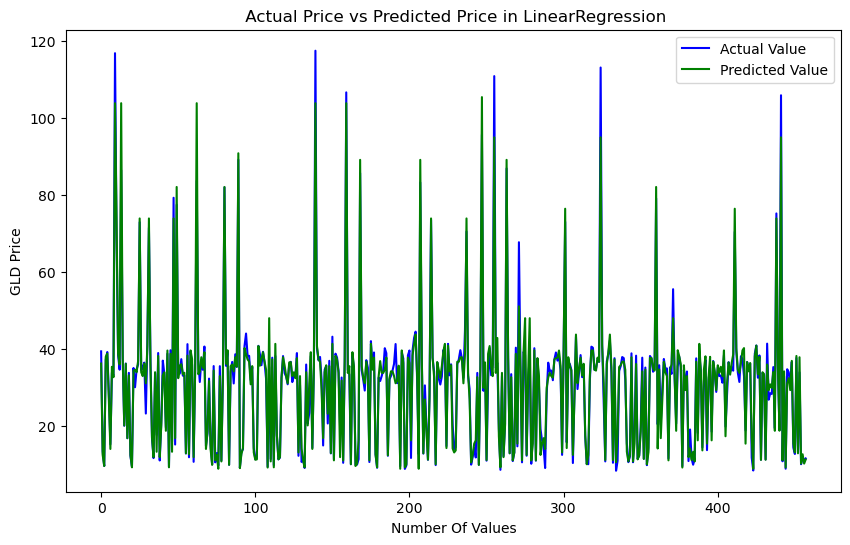

In [86]:
plt.figure(figsize=(10, 6))
# Plotting the actual values
plt.plot(y_test, color='blue', label='Actual Value')
# Plotting the predicted values
plt.plot(y_pred_dtr_uso, color='green', label='Predicted Value')
# Adding labels and title
plt.title(' Actual Price vs Predicted Price in LinearRegression')
plt.xlabel('Number Of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [87]:
param_grid = {'n_estimators': [100, 200, 300],'max_features': ['auto', 'sqrt','log2'],'max_depth': [10, 20, 30, None],'min_samples_split': [2, 5,10],'min_samples_leaf': [1, 2, 4]}

grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5,n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [88]:
best_rfr = grid_search.best_estimator_


y_pred_rfr_uso = best_rfr.predict(X_test)

In [89]:
mae_rfr_uso = mean_absolute_error(y_test, y_pred_rfr_uso)
mse_rfr_uso = mean_squared_error(y_test, y_pred_rfr_uso)
r2_rfr_uso = r2_score(y_test, y_pred_rfr_uso)
print(f"Best Random Forest Regressor: {best_rfr}")
print(f"Mean Absolute Error (MAE): {mae_rfr}")
print(f"Mean Squared Error (MSE): {mse_rfr}")
print(f"R-squared (R²): {r2_rfr}")

Best Random Forest Regressor: RandomForestRegressor(max_depth=20, max_features='log2', n_estimators=300)

Mean Absolute Error (MAE): 1.3844082109775193

Mean Squared Error (MSE): 5.385376127256839

R-squared (R²): 0.9902990175162626


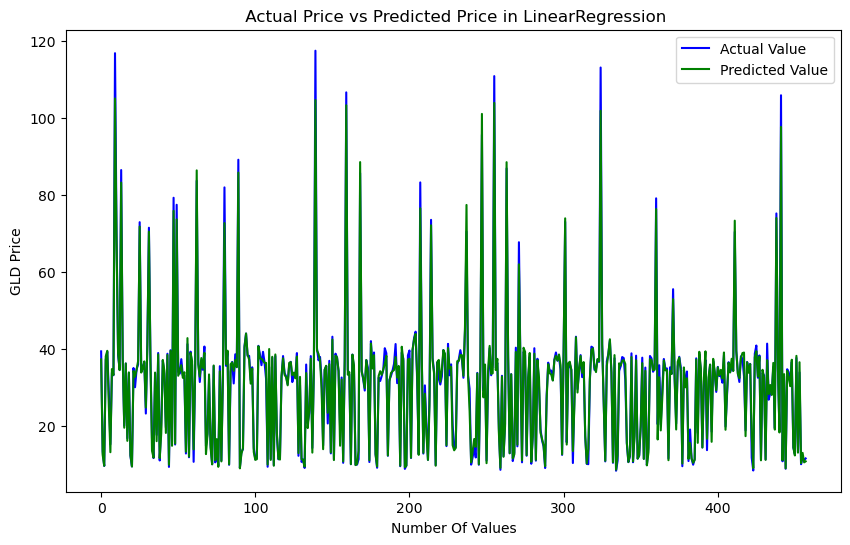

In [90]:
plt.figure(figsize=(10, 6))

plt.plot(y_test, color='blue', label='Actual Value')

plt.plot(y_pred_rfr_uso, color='green', label='Predicted Value')

plt.title(' Actual Price vs Predicted Price in LinearRegression')
plt.xlabel('Number Of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [91]:
df6 = pd.DataFrame({'Random Forest':y_pred_rfr_uso,
                   'Decision Tree':y_pred_dtr_uso,
                   'Linear Regression':y_pred_lr_uso,
                   'Actual Data':y_test})
df6

Random Forest  Decision Tree  Linear Regression  Actual Data
0        37.358295      36.289444          56.462924        39.46
1        12.590833      12.581111          20.364616        13.52
2         9.752402       9.698571          17.116318         9.72
3        38.163109      38.037059          39.036211        37.32
4        39.592587      38.890769          50.757981        39.28
..             ...            ...                ...          ...
453      36.633603      37.929231          32.251080        34.00
454      10.454002      10.325000          18.165424        10.17
455      13.109772      12.754286          18.064666        12.01
456      10.655416      10.328333          10.358265        11.19
457      10.917551      11.373333          11.674747        11.67

[458 rows x 4 columns]

In [92]:
try:
    con = msql.connect(host='127.0.0.1',user='root',password='peiman2012')
    if con.is_connected():
        cursor = con.cursor()
        cursor.execute("create database oil ")
        print("Databases is created....")

except Error as e :
    print("Error while connecting to MYSQL",e)

Error while connecting to MYSQL 1007 (HY000): Can't create database 'oil'; database exists


In [93]:
try:
    con = msql.connect(host='127.0.0.1',
                       user='root',
                       password='peiman2012',
                       database='oil'
                       )
    if con.is_connected():
        cursor = con.cursor()
        cursor.execute("SELECT DATABASE();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)
 
        cursor.execute('DROP TABLE IF EXISTS oil;')
        print('Creating table....')
        cursor.execute("""
            CREATE TABLE oil (
                RandomForest FLOAT, 
                DecisionTree FLOAT, 
                LinearRegression FLOAT,
                ActualData FLOAT
            )
        """)
        print("Table is created....")

        for index, row in df5.iterrows():
            sql = "INSERT INTO oil (RandomForest, DecisionTree, LinearRegression , ActualData) VALUES (%s, %s, %s,%s)"
            cursor.execute(sql, (float(row['Random Forest']), float(row['Decision Tree']), float(row['Linear Regression']),
                                float(row['Actual Data'])))
        
        con.commit()  
        print("Data inserted successfully.")

except Error as e:
    print("Error while connecting to MYSQL", e)

finally:
    if 'cursor' in locals():
        cursor.close()
    if 'con' in locals():
        con.close()

You're connected to database:  ('oil',)

Creating table....

Table is created....

Data inserted successfully.


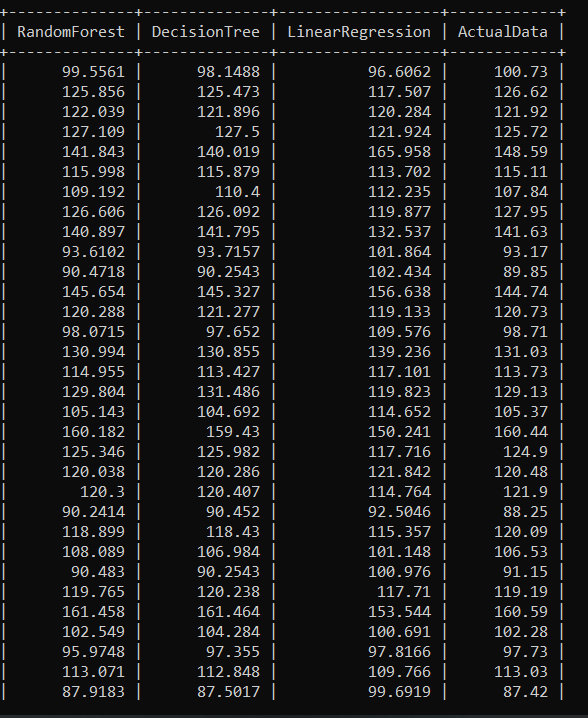

In [94]:
list_value_lruso = [list(df6[list(df5.columns)[2]]),list(df3['USO'])]
list_value_fruso = [list(df6[list(df5.columns)[1]]),list(df3['USO'])]
list_value_dtuso = [list(df6[list(df5.columns)[0]]),list(df3['USO'])]

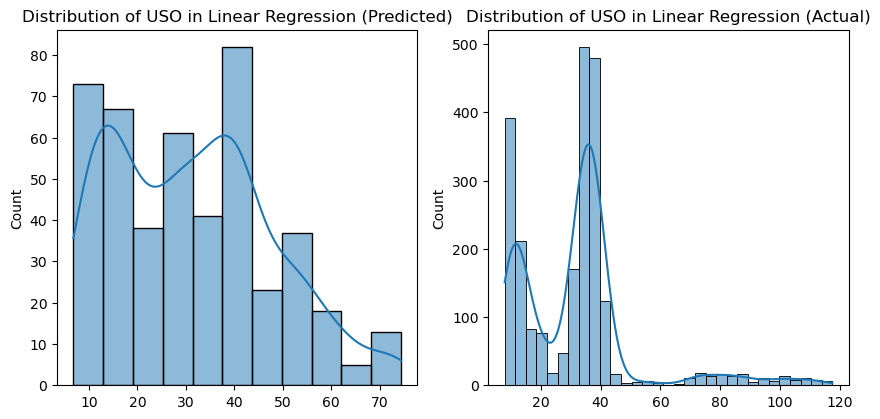

In [95]:
hist_seaborn(list_value_lruso,name[1],n3,n4[2])

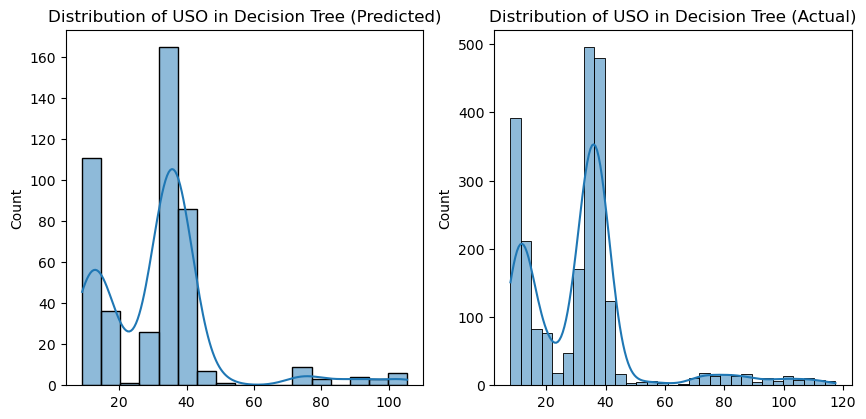

In [96]:
hist_seaborn(list_value_fruso,name[1],n3,n4[1])

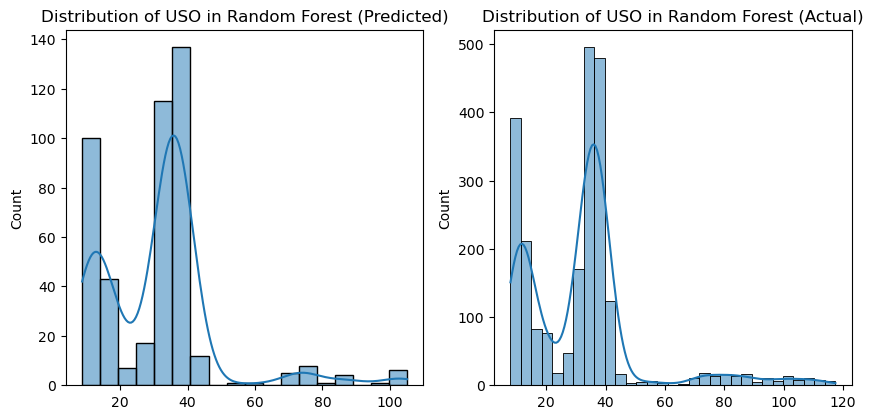

In [97]:
hist_seaborn(list_value_dtuso,name[1],n3,n4[0])

In [98]:
r2rfr.append(r2_rfr_uso)
r2dtr.append(r2_dtr_uso)
r2lr.append(r2_lr_uso)

In [99]:
X = df3.drop(['Date','SLV','Month Name', 'Season','Year', 'Month', 'Day'],axis=1)
y= df3['SLV']

In [100]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123)

In [101]:
lr.fit(X_train,y_train)

LinearRegression()

In [102]:
y_pred_lr_slv = lr.predict(X_test)

In [103]:
r2_lr_slv = metrics.r2_score(y_test,y_pred_lr_slv)
mse_lr_slv = metrics.mean_squared_error(y_test,y_pred_lr_slv)
mae_lr_slv = metrics.mean_absolute_error(y_test,y_pred_lr_slv)

print("Mean Squared Error on test set:", mse_lr_slv)
print("R-squared on test set:", r2_lr_slv)
print("Mean Absolute Error on test set:", mae_lr_slv)

Mean Squared Error on test set: 6.645251895303087

R-squared on test set: 0.8799742043137664

Mean Absolute Error on test set: 1.6956642730230582


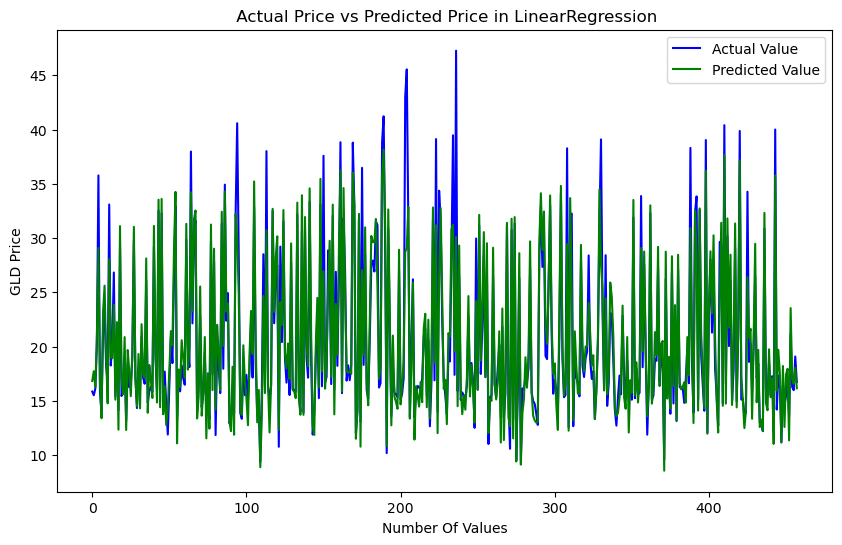

In [104]:
y_test = list(y_test)

plt.figure(figsize=(10, 6))

plt.plot(y_test, color='blue', label='Actual Value')

plt.plot(y_pred_lr_slv, color='green', label='Predicted Value')

plt.title(' Actual Price vs Predicted Price in LinearRegression')
plt.xlabel('Number Of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()


In [105]:
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=parameter, cv=5,scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 5400 candidates, totalling 27000 fits


C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 

15000 fits failed out of a total of 27000.

The score on these train-test partitions for these parameters will be set to nan.

If these failures are not expected, you can try to debug them by setting error_score='raise'.



Below are more details about the failures:

--------------------------------------------------------------------------------

2056 fits failed with the following error:

Traceback (most recent call last):

  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score

    estimator.fit(X_train, y_train, **fit_params)

  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit

    super().fit(

  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit

    self._validate_params()

  File "C:\ProgramData\anaconda3\lib\site-packages\

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolutr_error'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       14, 13, 15],
                         'max_features': ['auto', 'sprt', 'log2'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [1, 2, 5, 10, 20],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=2)

In [106]:
best_dt_regressor = grid_search.best_estimator_

best_dt_regressor

DecisionTreeRegressor(max_depth=13, max_features='auto', min_samples_leaf=2,
                      min_samples_split=1, random_state=42, splitter='random')

In [107]:
y_pred_dtr_slv = best_dt_regressor.predict(X_test)

In [108]:
r2_dtr_slv = r2_score(y_test, y_pred_dtr_slv)
mse_dtr_slv = mean_squared_error(y_test, y_pred_dtr_slv)
mae_dtr_slv = mean_absolute_error(y_test, y_pred_dtr_slv)


print("Mean Squared Error on test set:", mse_dtr_slv)
print("R-squared on test set:", r2_dtr_slv)
print("Mean Absolute Error on test set:", mae_dtr_slv)

Mean Squared Error on test set: 0.6699354478691928

R-squared on test set: 0.9878997009510283

Mean Absolute Error on test set: 0.4567331523046633


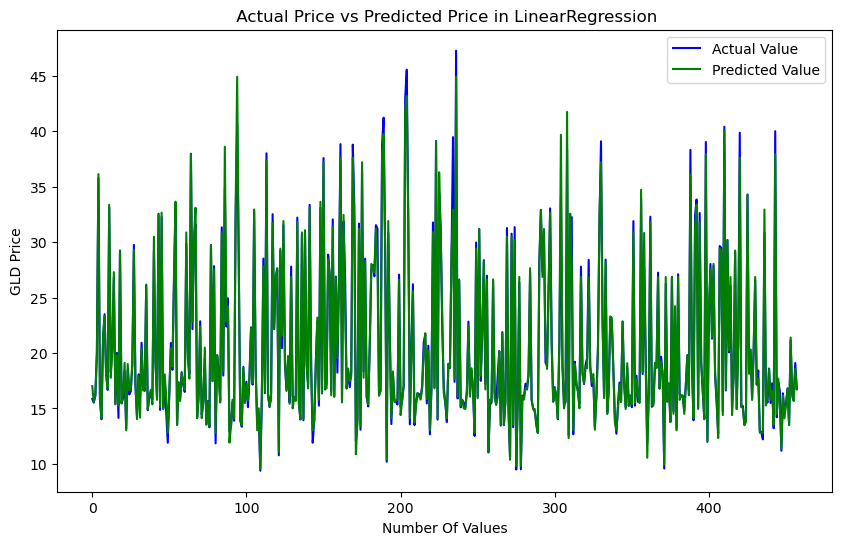

In [109]:
plt.figure(figsize=(10, 6))
# Plotting the actual values
plt.plot(y_test, color='blue', label='Actual Value')
# Plotting the predicted values
plt.plot(y_pred_dtr_slv, color='green', label='Predicted Value')
# Adding labels and title
plt.title(' Actual Price vs Predicted Price in LinearRegression')
plt.xlabel('Number Of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [110]:
param_grid = {'n_estimators': [100, 200, 300],'max_features': ['auto', 'sqrt','log2'],'max_depth': [10, 20, 30, None],'min_samples_split': [2, 5,10],'min_samples_leaf': [1, 2, 4]}

grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5,n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.

  warn(


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [111]:
best_rfr = grid_search.best_estimator_

In [112]:
y_pred_rfr_slv = best_rfr.predict(X_test)


mae_rfr_slv = mean_absolute_error(y_test, y_pred_rfr_slv)
mse_rfr_slv = mean_squared_error(y_test, y_pred_rfr_slv)
r2_rfr_slv = r2_score(y_test, y_pred_rfr_slv)
print(f"Best Random Forest Regressor: {best_rfr}")
print(f"Mean Absolute Error (MAE): {mae_rfr_slv}")
print(f"Mean Squared Error (MSE): {mse_rfr_slv}")
print(f"R-squared (R²): {r2_rfr_slv}")

Best Random Forest Regressor: RandomForestRegressor(max_depth=20, max_features='auto', n_estimators=300)

Mean Absolute Error (MAE): 0.336591335027375

Mean Squared Error (MSE): 0.3330118689355298

R-squared (R²): 0.9939851769095167


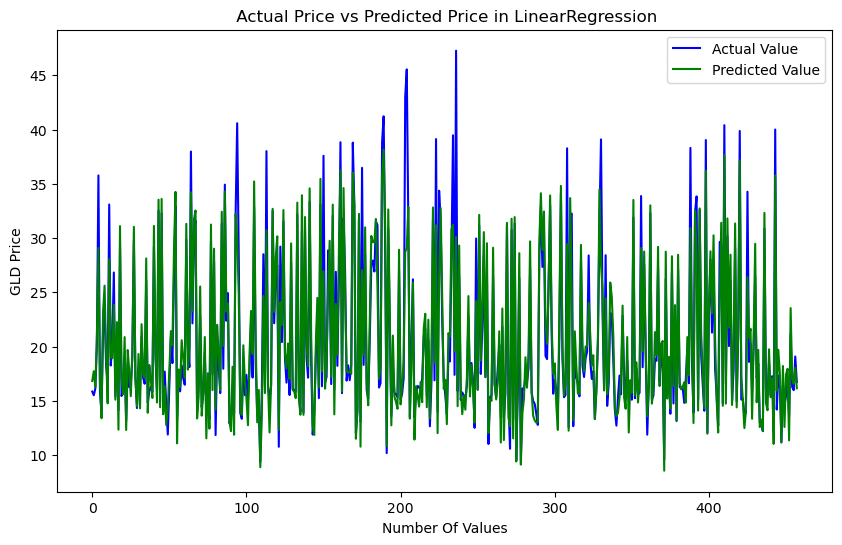

In [113]:
plt.figure(figsize=(10, 6))
# Plotting the actual values
plt.plot(y_test, color='blue', label='Actual Value')
# Plotting the predicted values
plt.plot(y_pred_lr_slv, color='green', label='Predicted Value')
# Adding labels and title
plt.title(' Actual Price vs Predicted Price in LinearRegression')
plt.xlabel('Number Of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [114]:
df7 = pd.DataFrame({'Random Forest':y_pred_rfr_slv,
                   'Decision Tree':y_pred_dtr_slv,
                   'Linear Regression':y_pred_lr_slv,
                   'Actual Data':y_test})
df7

Random Forest  Decision Tree  Linear Regression  Actual Data
0        16.353730      17.010000          16.837451        15.86
1        15.640606      15.584000          17.732762        15.52
2        16.102580      16.197273          16.300049        16.13
3        19.657300      19.731667          21.014539        20.10
4        34.708033      36.130000          29.088213        35.77
..             ...            ...                ...          ...
453      21.415467      21.392857          23.548431        21.16
454      16.326933      16.072222          17.030261        16.27
455      15.671649      15.660000          16.575089        15.99
456      18.803833      18.598824          18.043514        19.09
457      16.474113      16.784138          16.165461        16.73

[458 rows x 4 columns]

In [115]:
try:
    con = msql.connect(host='127.0.0.1',user='root',password='peiman2012')
    if con.is_connected():
        cursor = con.cursor()
        cursor.execute("create database silver ")
        print("Databases is created....")

except Error as e :
    print("Error while connecting to MYSQL",e)

Error while connecting to MYSQL 1007 (HY000): Can't create database 'silver'; database exists


In [116]:
try:
    con = msql.connect(host='127.0.0.1',
                       user='root',
                       password='peiman2012',
                       database='silver'
                       )
    if con.is_connected():
        cursor = con.cursor()
        cursor.execute("SELECT DATABASE();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)
 
        cursor.execute('DROP TABLE IF EXISTS silver;')
        print('Creating table....')
        cursor.execute("""
            CREATE TABLE silver (
                RandomForest FLOAT, 
                DecisionTree FLOAT, 
                LinearRegression FLOAT,
                ActualData FLOAT
            )
        """)
        print("Table is created....")

        for index, row in df5.iterrows():
            sql = "INSERT INTO silver (RandomForest, DecisionTree, LinearRegression , ActualData) VALUES (%s, %s, %s,%s)"
            cursor.execute(sql, (float(row['Random Forest']), float(row['Decision Tree']), float(row['Linear Regression']),
                                float(row['Actual Data'])))
        
        con.commit()  
        print("Data inserted successfully.")

except Error as e:
    print("Error while connecting to MYSQL", e)

finally:
    if 'cursor' in locals():
        cursor.close()
    if 'con' in locals():
        con.close()

You're connected to database:  ('silver',)

Creating table....

Table is created....

Data inserted successfully.


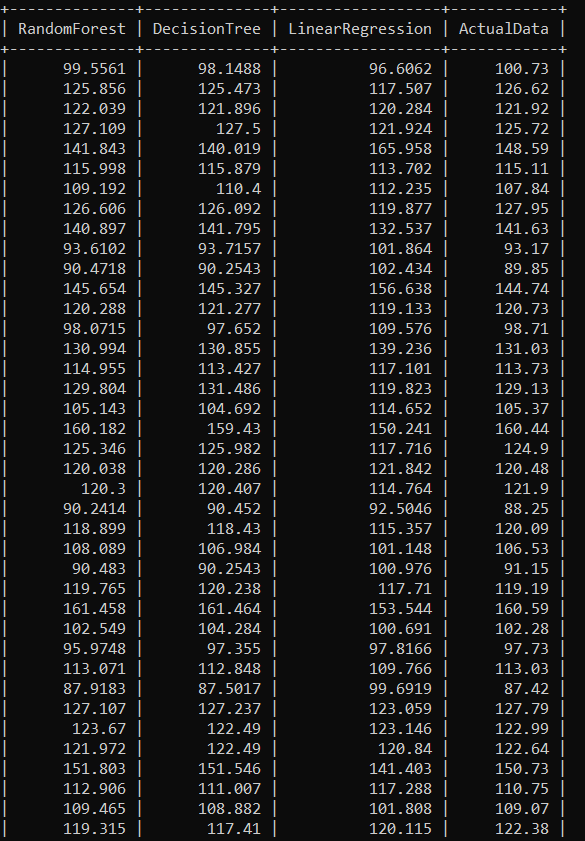

In [117]:
r2rfr.append(r2_rfr_slv)
r2dtr.append(r2_dtr_slv)
r2lr.append(r2_lr_slv)

In [118]:
list_value_lrslv = [list(df7[list(df5.columns)[2]]),list(df3['SLV'])]
list_value_frslv = [list(df7[list(df5.columns)[1]]),list(df3['SLV'])]
list_value_dtslv = [list(df7[list(df5.columns)[0]]),list(df3['SLV'])]

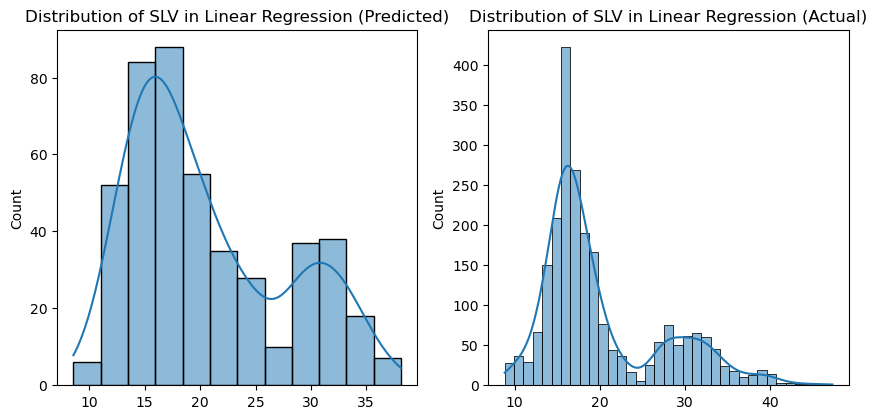

In [119]:
hist_seaborn(list_value_lrslv,name[2],n3,n4[2])

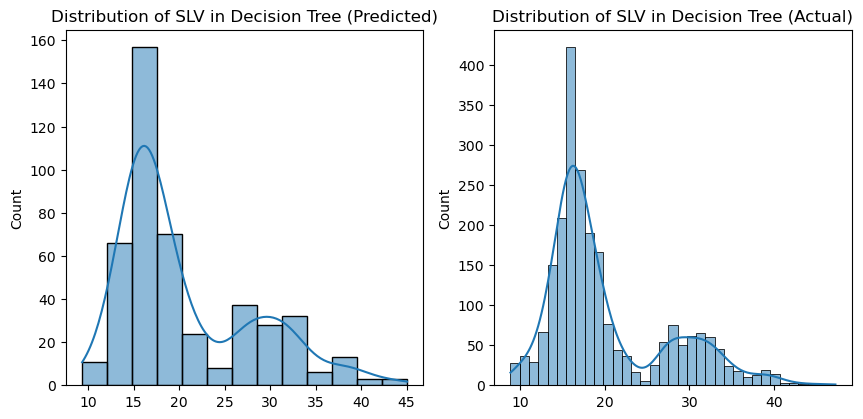

In [120]:
hist_seaborn(list_value_dtslv,name[2],n3,n4[1])

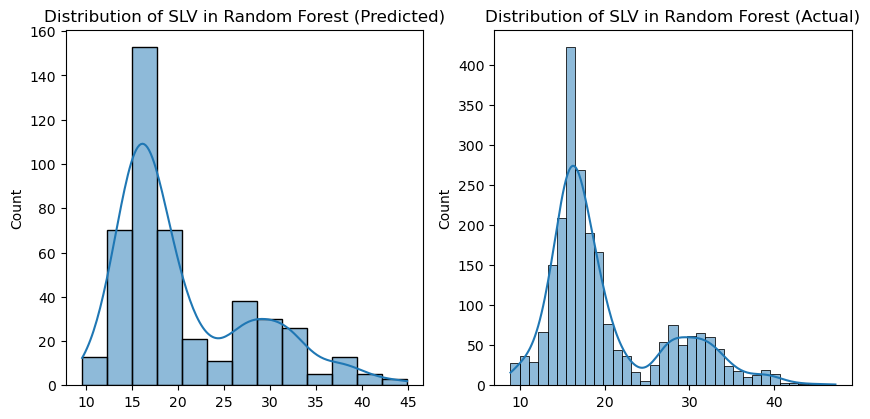

In [121]:
hist_seaborn(list_value_frslv,name[2],n3,n4[0])

In [122]:
df10 = pd.DataFrame({'Random Forest':r2rfr,
                   'Decision Tree':r2dtr,
                   'Linear Regression':r2lr})
df10

Random Forest  Decision Tree  Linear Regression
0       0.990299        0.98304           0.854913
1       0.988480        0.96907           0.688553
2       0.993985        0.98790           0.879974

In [123]:
df10_name = list(df10.columns)

In [124]:
gold=[]
for i in df10[:1].values:
    for j in range(len(df10_name)):
        gold.append(i[j])
gold

[0.9902990175162626, 0.9830401627382054, 0.8549131012621785]

In [125]:
oil=[]
for i in df10[1:2].values:
    for j in range(len(df10_name)):
        oil.append(i[j])
oil

[0.988479891194836, 0.9690696817755869, 0.6885528891092679]

In [126]:
silver=[]
for i in df10[2:3].values:
    for j in range(len(df10_name)):
        silver.append(i[j])
silver

[0.9939851769095167, 0.9878997009510283, 0.8799742043137664]

In [323]:
formgld = [float(f'{score:.5f}') for score in gold] 
formoil = [float(f'{score:.5f}') for score in oil] 
formslv = [float(f'{score:.5f}') for score in silver] 

In [324]:
st = [formgld,formoil,formslv]

In [325]:
def bar_r2score(n1,n2,n3):
    plt.bar(n1,n2)
    for i in range(len(n1)):
        plt.text(i, n2[i] + 0.001, str(n2[i]), ha='center',va ='bottom')
    plt.title(f'R2-score in {n3}')
    plt.show()

In [326]:
def bar_r2score(ax, n1, n2, n3):
    ax.bar(n1, n2)
    for i in range(len(n1)):
        ax.text(i, n2[i] + 0.001, str(n2[i]), ha='center', va='bottom')
    ax.set_title(f'R2-score in {n3}')
    ax.set_xlabel('Categories')
    ax.set_ylabel('Values')

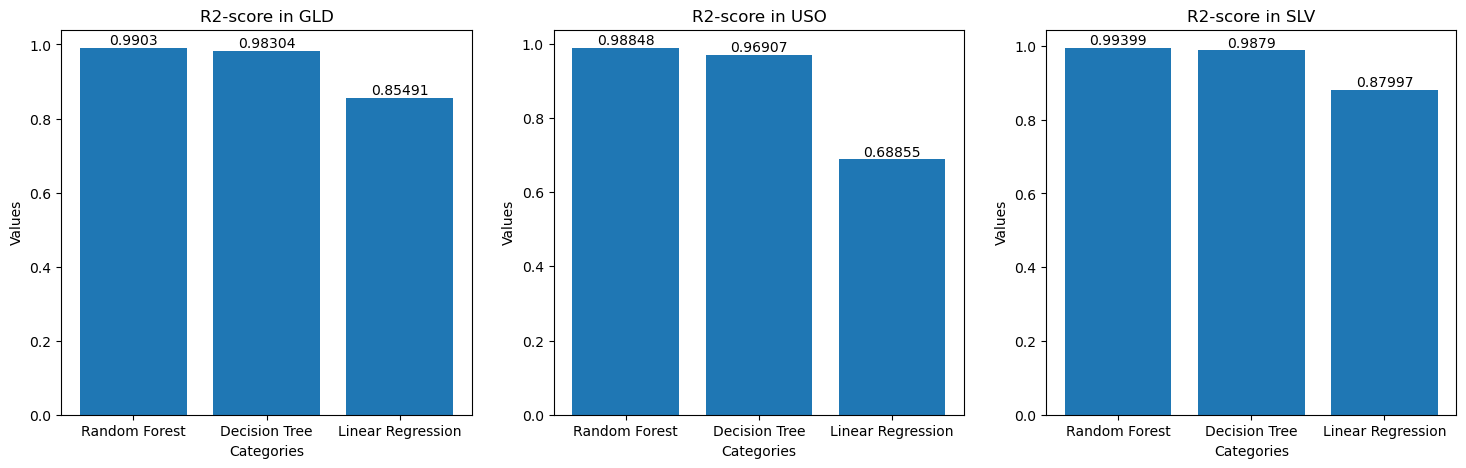

In [327]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

for i in range(0,3):
    bar_r2score(axes[i], df10_name, st[i], name[i])

In [328]:
# bar_r2score(df10_name,gold,name[0])

In [329]:
# bar_r2score(df10_name,oil,name[1])

In [330]:
# bar_r2score(df10_name,silver,name[2])

In [131]:
try:
    con = msql.connect(host='127.0.0.1',user='root',password='peiman2012')
    if con.is_connected():
        cursor = con.cursor()
        cursor.execute("create database GoldPriceR2Score ")
        print("Databases is created....")

except Error as e :
    print("Error while connecting to MYSQL",e)

Error while connecting to MYSQL 1007 (HY000): Can't create database 'goldpricer2score'; database exists


In [132]:
try:
    con = msql.connect(host='127.0.0.1',
                       user='root',
                       password='peiman2012',
                       database='goldpricer2score'
                       )
    if con.is_connected():
        cursor = con.cursor()
        cursor.execute("SELECT DATABASE();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)
 
        cursor.execute('DROP TABLE IF EXISTS GoldPR2Score2;')
        print('Creating table....')
        cursor.execute("""
            CREATE TABLE GoldPR2Score2 (
                RandomForest FLOAT, 
                DecisionTree FLOAT, 
                LinearRegression FLOAT
            )
        """)
        print("Table is created....")

        for index, row in df10.iterrows():
            sql = "INSERT INTO GoldPR2Score2 (RandomForest, DecisionTree, LinearRegression) VALUES (%s, %s, %s)"
            cursor.execute(sql, (float(row['Random Forest']), float(row['Decision Tree']), float(row['Linear Regression'])))
        
        con.commit()  
        print("Data inserted successfully.")

except Error as e:
    print("Error while connecting to MYSQL", e)

finally:
    if 'cursor' in locals():
        cursor.close()
    if 'con' in locals():
        con.close()

You're connected to database:  ('goldpricer2score',)

Creating table....

Table is created....

Data inserted successfully.


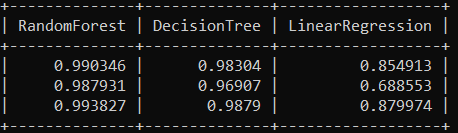

**According to this table:**

**SLV (Silver):**

<table>
<thead>
<tr><th>Random Forest</th><th>Decision Tree</th><th>Linear Regression</th></tr>
</thead>
<tbody>
<tr><td>0.990299</td><td> 0.983040</td><td>0.8549133</td></tr>
</tbody>
</table>


The best model for **SLV** is the **Decision Tree** model with a coefficient of determination of **0.983040**.
**GLD (gold):**

<table>
<thead>
<tr><th>Random Forest</th><th>Decision Tree</th><th>Linear Regression</th></tr>
</thead>
<tbody>
<tr><td>0.988480</td><td> 0.969070</td><td> 0.688553</td></tr>
</tbody>
</table>


The best model for **GLD** is the **Decision Tree** model with a coefficient of determination of **0.969070**.
**USO (crude oil):**

<table>
<thead>
<tr><th>Random Forest</th><th>Decision Tree</th><th>Linear Regression</th></tr>
</thead>
<tbody>
<tr><td>0.993985</td><td> 0.987900</td><td>0.879974</td></tr>
</tbody>
</table>


The best model for **USO** is the **Decision Tree** model with a coefficient of determination of **0.987900**.

Therefore, the **Decision Tree** model has the best performance for predicting the prices of **SLV, GLD and USO**.

<a id="10"></a>
# <p style="background-color:#3B6978;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">💻 Manual sampling of data 💻</p>

In [133]:
name_list=[]
r2_list=[]
mse_list=[]

In [140]:
def future_stock_test(test1,forc,ser,name7):
    plt.figure(figsize=(10,6))
    plt.title(f'Prediction of test data for {name7}')
    plt.plot(ser[:2000], label='Train')
    plt.plot(np.arange(2000, 2000 + len(test1)), test1, color='orange', label='Actual')
    plt.plot(np.arange(2000, 2000 + len(forc)), forc, color='green', linestyle='--', label='Forecast')

    index_ticks = np.arange(-30, 2700, 500)  
    years = np.linspace(2008, 2018, len(index_ticks))    

    plt.xticks(index_ticks, years.astype(int))  

    plt.xlim([-100, 2600])
    plt.legend()
    plt.show()

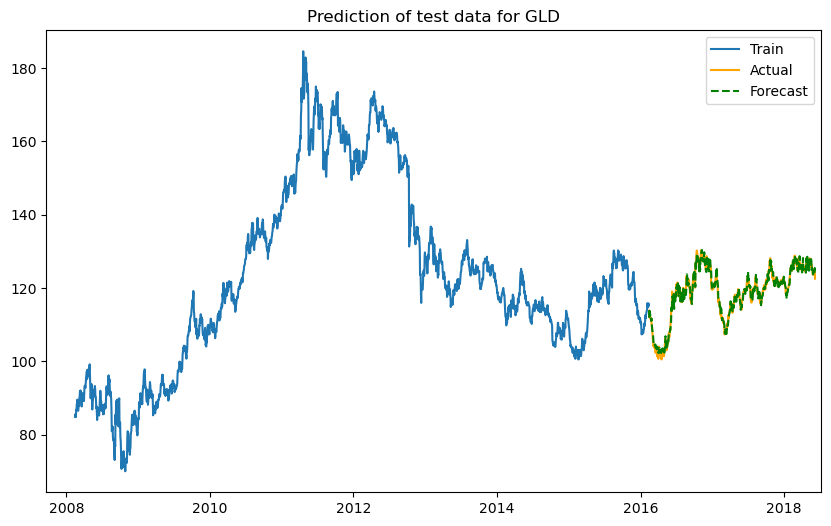

('Test MSE: 1.3843', 'Test R2-Score: 0.9722')

In [144]:
import matplotlib.dates as mdates
series = df['GLD'].values

def create_features(series, window_size):
    X, y = [], []
    for i in range(len(series) - window_size):
        X.append(series[i:i+window_size])
        y.append(series[i+window_size])
    return np.array(X), np.array(y)


window_size = 10

X, y = create_features(series, window_size)

X_train, X_test = X[:1701], X[1701:]
y_train, y_test = y[:1701], y[1701:]

model = RandomForestRegressor(max_depth=40, n_estimators=200)
model.fit(X_train, y_train)


forecast = model.predict(X_test)


error_mse_gld = f'Test MSE: {mean_squared_error(y_test, forecast):.4f}'
error_r2_gld  = f'Test R2-Score: {r2_score(y_test, forecast):.4f}'

error_mse_gld1=mean_squared_error(y_test, forecast)
error_r2_gld1= r2_score(y_test, forecast)


future_stock_test(y_test,forecast,series,name_list[0])

name_list.append('GLD')
r2_list.append(error_r2_gld1)
mse_list.append(error_mse_gld1)
error_mse_gld ,error_r2_gld 

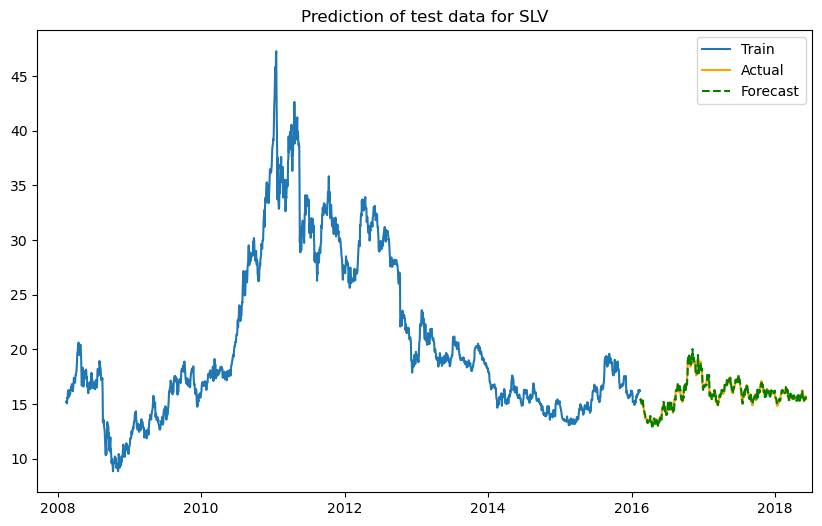

('Test MSE: 0.0629', 'Test R2-Score: 0.9637')

In [145]:
series = df['SLV'].values

def create_features(series, window_size):
    X, y = [], []
    for i in range(len(series) - window_size):
        X.append(series[i:i+window_size])
        y.append(series[i+window_size])
    return np.array(X), np.array(y)


window_size = 10


X, y = create_features(series, window_size)

X_train, X_test = X[:1701], X[1701:]
y_train, y_test = y[:1701], y[1701:]

model = RandomForestRegressor(max_depth=10, n_estimators=800)
model.fit(X_train, y_train)

forecast = model.predict(X_test)

error_mse_slv = f'Test MSE: {mean_squared_error(y_test, forecast):.4f}'
error_r2_slv  = f'Test R2-Score: {r2_score(y_test, forecast):.4f}'

error_mse_slv1=mean_squared_error(y_test, forecast)
error_r2_slv1= r2_score(y_test, forecast)


future_stock_test(y_test,forecast,series,name_list[1])

name_list.append('SLV')
r2_list.append(error_r2_slv1)
mse_list.append(error_mse_slv1)
error_mse_slv,error_r2_slv

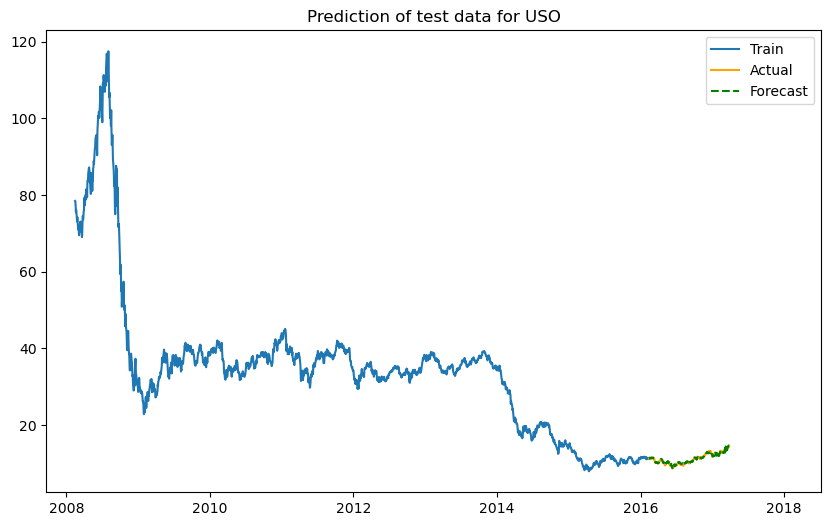

('Test MSE: 0.0630', 'Test R2-Score: 0.9656')

In [146]:
series = df['USO'].values

def create_features(series, window_size):
    X, y = [], []
    for i in range(len(series) - window_size):
        X.append(series[i:i+window_size])
        y.append(series[i+window_size])
    return np.array(X), np.array(y)

window_size = 10

X, y = create_features(series, window_size)

X_train, X_test = X[:2000], X[2000:]
y_train, y_test = y[:2000], y[2000:]

model = RandomForestRegressor(max_depth=20, n_estimators=200)
model.fit(X_train, y_train)

forecast = model.predict(X_test)

error_mse_uso = f'Test MSE: {mean_squared_error(y_test, forecast):.4f}'
error_r2_uso  = f'Test R2-Score: {r2_score(y_test, forecast):.4f}'

error_mse_uso1=mean_squared_error(y_test, forecast)
error_r2_uso1= r2_score(y_test, forecast)

future_stock_test(y_test,forecast,series,name_list[2])

name_list.append('USO')
r2_list.append(error_r2_uso1)
mse_list.append(error_mse_uso1)
error_mse_uso,error_r2_uso

In [137]:
df_fu=pd.DataFrame({
    'Name':name_list,
    'R2-Score':r2_list,
    'MSE':mse_list
}
)
df_fu

Name  R2-Score       MSE
0  GLD  0.972612  1.363605
1  SLV  0.963664  0.062980
2  USO  0.964138  0.065734

<a id="10"></a>
# <p style="background-color:#3B6978;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">💻 Predicting the future using data 💻</p>

In [560]:
from statsmodels.tsa.arima.model import ARIMA

models = {
    'SPX': ARIMA(df['SPX'], order=(5, 2, 1)),
    'SLV': ARIMA(df['SLV'], order=(8, 2, 0)),
    'GLD': ARIMA(df['GLD'], order=(8, 2, 3)),
    'USO': ARIMA(df['USO'], order=(20, 2, 1)),
    'EUR/USD': ARIMA(df['EUR/USD'], order=(0, 2, 2))
}


forecast_list = []
key_list = []

for key, model in models.items():
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=365)
    forecast_list.append(forecast)
    key_list.append(key)


future_dates = pd.date_range(start='2018-05-16', periods=365, freq='D')


future_data = pd.DataFrame({
    'Date': future_dates
})


for forecast, key in zip(forecast_list, key_list):
    future_data[key] = forecast.values

future_data


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

  warn('Non-stationary starting autoregressive parameters'

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.

  warn('Non-invertible starting MA parameters found.'

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals

  warnings.warn("Maximum Likelihood optimization failed to "

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

  warn('Non-stationary starting autoregressive parameters'

C:\ProgramData\anaconda3\lib\si

Date          SPX        SLV         GLD        USO   EUR/USD
0   2018-05-16  2726.874802  15.457240  122.662095  14.372128  1.184817
1   2018-05-17  2726.655450  15.467544  122.614691  14.352594  1.184770
2   2018-05-18  2726.578903  15.482541  122.720508  14.360535  1.184723
3   2018-05-19  2727.810264  15.495104  122.755752  14.409011  1.184676
4   2018-05-20  2729.138478  15.463841  122.666189  14.387872  1.184629
..         ...          ...        ...         ...        ...       ...
360 2019-05-11  3118.796292  11.805468  127.995902   4.405568  1.167918
361 2019-05-12  3119.890624  11.795201  128.010949   4.375891  1.167871
362 2019-05-13  3120.984956  11.784933  128.025996   4.346214  1.167824
363 2019-05-14  3122.079288  11.774665  128.041043   4.316537  1.167777
364 2019-05-15  3123.173619  11.764398  128.056090   4.286859  1.167730

[365 rows x 6 columns]

In [561]:
future_data.index = range(2290, 2290 + len(future_data))

In [597]:
def future_stock(names):
    plt.figure(figsize=(15, 10))
    for i, name in enumerate(names):
        plt.subplot(2, 3, i + 1)
        plt.plot(df[name], label='Historical Data')
        plt.plot(future_data[name], label='Future Prediction')
        plt.title(f'Prediction of a future year for {name}')
        index_ticks = np.arange(-30, 2900, 500)   
        years = np.linspace(2008, 2018, len(index_ticks))    

        plt.xticks(index_ticks, years.astype(int))  
        plt.xlim([-100, 2900])
        plt.legend()
    plt.tight_layout()
    plt.show()


In [598]:
name5=list(future_data.columns)
name5

['Date', 'SPX', 'SLV', 'GLD', 'USO', 'EUR/USD']

In [599]:
name[3] = 'EUR/USD'

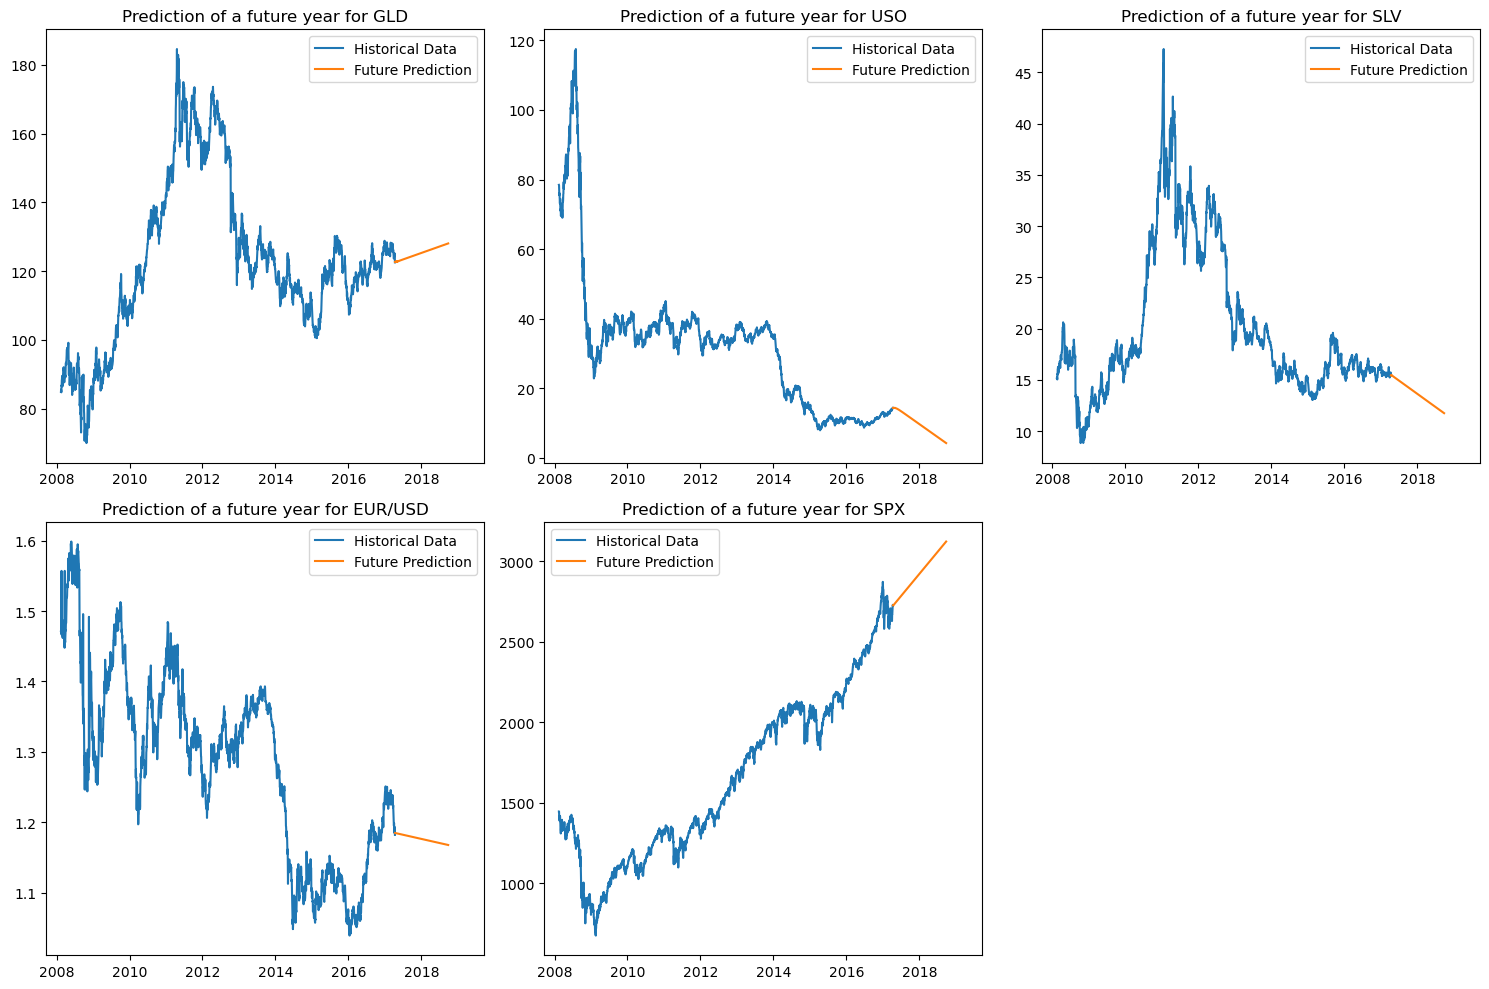

In [600]:
future_stock(name)

<nav>
<a href="https://www.linkedin.com/in/peymandaeirezaei/-">LinkedIn </a> |
<a href="https://github.com/Peyman2012/Gold-price-ML-EDA">Github</a> |
<a href="https://www.kaggle.com/code/peimandaii/gold-price-data">Kaggle</a> |
</nav>